# The Big Picture

This is the outline of the analysis:

1. Cluster countries by weather/climate and perform a basic analysis of these clusters
2. Via linear regression, identify the primary factors that affect yield (GDP per capita? Fertilizer use? Weather?)
But weather is highly correlated! So use a different technique to build a model to predict yield e.g. Regression Trees (Ideally need a model that can rank inportance of factors ala regression) Compare the accuracies of the two models
3. Considering the issues we face with climate change, what do the models infer about future rice production?

# GDP per Capita

Our current data set is not the best. And I find that the country is a VERY strong predictor of yield. Therefore I will be inclusing GDP per capita as a proxy for this factor i.e. I am hoping GDP per capita is correlated to yield in some fashion!

I retrieved this data set from 

http://data.un.org/Data.aspx?q=GDP+per+capita&d=SNAAMA&f=grID%3a101%3bcurrID%3aUSD%3bpcFlag%3a1

Note that I had to change the countrt "Former Sudan" (1971-2007) -> Sudan

In [1]:
# Set the working directory
setwd("/Users/billyhanan/Documents/NCI  Diploma in Data Analytics/Advanced Data Mining/Project")

# Read in primary data file
df1 = read.csv("./Data/Final_crop_data.csv",header=T)

# Delete unnecessary columns
df1$X <- NULL
df1$SEQ_NO <- NULL

# Rename column
names(df1)[3] <- "COUNTRY"

# Read in file with ISO country codes
df_iso = read.csv("./Data/wikipedia-iso-country-codes.csv",header=T)
names(df_iso)[1] <- 'Name'

# Merge two files
df = merge(df1, df_iso, by.x='ISO', by.y='Alpha.3.code')

# Delete redundant columns
df$Alpha.2.code = NULL
df$Numeric.code = NULL
df$ISO.3166.2 = NULL

# Assign values to COUNTRY column
df$COUNTRY = df$Name
df$Name = NULL

# Simplify some of the country names
levels(df$COUNTRY)[levels(df$COUNTRY)=="Bolivia, Plurinational State of"] = "Bolivia"
levels(df$COUNTRY)[levels(df$COUNTRY)=="Brunei Darussalam"] = "Brunei"
levels(df$COUNTRY)[levels(df$COUNTRY)=="Côte d'Ivoire"] = "Ivory Coast"
levels(df$COUNTRY)[levels(df$COUNTRY)=="Iran, Islamic Republic of"] = "Iran"
levels(df$COUNTRY)[levels(df$COUNTRY)=="Korea, Republic of"] = "South Korea"
levels(df$COUNTRY)[levels(df$COUNTRY)=="Lao People's Democratic Republic"] = "Laos"
levels(df$COUNTRY)[levels(df$COUNTRY)=="Macedonia, the former Yugoslav Republic of"] = "Macedonia"
levels(df$COUNTRY)[levels(df$COUNTRY)=="Russian Federation"] = "Russia"
levels(df$COUNTRY)[levels(df$COUNTRY)=="Tanzania, United Republic of"] = "Tanzania"
levels(df$COUNTRY)[levels(df$COUNTRY)=="Venezuela, Bolivarian Republic of"] = "Venezuela"
levels(df$COUNTRY)[levels(df$COUNTRY)=="Viet Nam"] = "Vietnam"

# Remove redundant levels
df=droplevels(df)

# Read in csv file holding total annual paddy rice production 
df1 = read.csv("./Data/wrs_annual_rice_production.csv",header=T)

# Create temporary capitalised country column in Master dataframe
df$CAP_COUNTRY = toupper(df$COUNTRY)

# Merge with master data frame
df2 = merge(df, df1, by.x=c('CAP_COUNTRY','YEAR'), by.y=c('Country','Year'), all.x=T) 

# Shift PRODUCTION column and remove redundant Year and CAP_COUNTRY columns
df = df2[c('COUNTRY','ISO','YEAR','LAND_AREA','HARV_AREA','FERT','YIELD','PRODUCTION','AVG_TEMP_JAN','AVG_TEMP_FEB','AVG_TEMP_MAR','AVG_TEMP_APR','AVG_TEMP_MAY','AVG_TEMP_JUN','AVG_TEMP_JUL','AVG_TEMP_AUG','AVG_TEMP_SEP','AVG_TEMP_OCT','AVG_TEMP_NOV','AVG_TEMP_DEC','AVG_RF_JAN','AVG_RF_FEB','AVG_RF_MAR','AVG_RF_APR','AVG_RF_MAY','AVG_RF_JUN','AVG_RF_JUL','AVG_RF_AUG','AVG_RF_SEP','AVG_RF_OCT','AVG_RF_NOV','AVG_RF_DEC','AVG_Q1_TEMP','AVG_Q2_TEMP','AVG_Q3_TEMP','AVG_Q4_TEMP','AVG_Q4_RF','AVG_Q3_RF','AVG_Q2_RF','AVG_Q1_RF')]

#
# Append GDP per Capita data to master dataframe
#

# Read in primary data file
df_gdp = read.csv("./Data/UN_gdp_data.csv",header=T)

names(df_gdp) <- c("Country","Year","Item","GDP.PER.CAPITA")

df_gdp <- df_gdp[,c("Country","Year","GDP.PER.CAPITA")]

# Rename some country names
df_gdp$Country <- as.character(df_gdp$Country)
df_gdp[df_gdp$Country=="Bolivia (Plurinational State of)","Country"] = "Bolivia, Plurinational State of"
df_gdp[df_gdp$Country=="China, People's Republic of","Country"] = "China"
df_gdp[df_gdp$Country=="The former Yugoslav Republic of Macedonia","Country"] = "Macedonia, the former Yugoslav Republic of"
df_gdp[df_gdp$Country=="Republic of Korea","Country"] = "Korea, Republic of"
df_gdp[df_gdp$Country=="Kingdom of Eswatini","Country"] = "Swaziland"
df_gdp[df_gdp$Country=="United Republic of Tanzania: Mainland","Country"] = "Tanzania, United Republic of"
df_gdp[df_gdp$Country=="Venezuela (Bolivarian Republic of)","Country"] = "Venezuela, Bolivarian Republic of"
df_gdp$Country <- factor(df_gdp$Country)

# Remove redundant levels
df_gdp=droplevels(df_gdp)

# Read in file with ISO country codes
df_iso = read.csv("./Data/wikipedia-iso-country-codes.csv",header=T)
names(df_iso)[1] <- 'Name'

# Merge GDP per Capita data with ISO data
df_gdp_iso = merge(df_gdp, df_iso, by.x='Country', by.y='Name')

# Remove unneeded columns
df_gdp_iso <- df_gdp_iso[c('Country','Alpha.3.code','Year','GDP.PER.CAPITA')]

# Append GDP per Capita data to master dataframe
df = merge(df, df_gdp_iso, by.x=c('ISO','YEAR'), by.y=c('Alpha.3.code','Year'), all.x=T)

# Delete redundant columns
df$Country = NULL

# Remove unneeded variables
rm(df1)
rm(df2)

# Taking logarithm of some highly skewed variables that are causing outlier issues
df$FERT = log(df$FERT)
df$HARV_AREA = log(df$HARV_AREA)
df$GDP.PER.CAPITA = log(df$GDP.PER.CAPITA)

library(repr)

# Change plot size 
options(repr.plot.width=6, repr.plot.height=5)

In [2]:
head(df)


ISO,YEAR,COUNTRY,LAND_AREA,HARV_AREA,FERT,YIELD,PRODUCTION,AVG_TEMP_JAN,AVG_TEMP_FEB,⋯,AVG_RF_DEC,AVG_Q1_TEMP,AVG_Q2_TEMP,AVG_Q3_TEMP,AVG_Q4_TEMP,AVG_Q4_RF,AVG_Q3_RF,AVG_Q2_RF,AVG_Q1_RF,GDP.PER.CAPITA
AFG,1991,Afghanistan,65286,12.06105,1.8148247,1.94,335000,-0.03110,1.43654,⋯,38.55690,2.764097,17.69763,22.97277,8.143453,18.43989,7.230680,38.21139,81.26800,5.549295
AFG,1992,Afghanistan,65286,12.07254,1.7561323,1.71,300000,0.74637,2.46018,⋯,47.46040,2.973320,16.89697,21.80963,8.498270,24.41974,7.827567,44.34204,59.46273,5.515519
AFG,1993,Afghanistan,65286,12.07254,1.6311994,1.71,300000,-0.08350,4.33465,⋯,20.68180,3.457163,18.33557,22.52880,7.587023,16.62800,5.226967,29.86003,53.98010,5.173364
AFG,1994,Afghanistan,65286,12.10071,1.7613750,1.90,342000,1.11415,1.14112,⋯,36.94000,3.744203,18.18197,22.22033,8.173570,23.60247,11.033253,23.07017,56.36823,4.873295
AFG,1995,Afghanistan,65286,12.04355,1.7613750,2.29,390000,0.92358,2.96133,⋯,35.71700,3.417947,17.96013,23.05943,7.726067,18.51706,7.733073,31.69475,42.35450,5.243134
AFG,1996,Afghanistan,65286,12.07254,-0.4307829,1.94,340000,-0.48840,2.86922,⋯,6.71934,3.225333,17.79007,22.77710,7.208570,10.37393,5.784513,27.51930,63.32300,5.166501


# Initial Data Exploration

Let us check our data for null or suspicious values

In [3]:
# We have annual data from 1991-2015 (inclusive) for 105 countries 
unique(df$COUNTRY)
cat(paste('Number of countries = ',length(unique(df$COUNTRY))))
unique(df$YEAR)

# Some null values exist however
cat(paste('Number of null values = ',sum(colSums(is.na(df)))))

# And they all exist in the PRODUCTION column
sum(is.na(df$PRODUCTION))

[1] Afghanistan              Angola                   Argentina               
  [4] Australia                Azerbaijan               Burundi                 
  [7] Benin                    Burkina Faso             Bangladesh              
 [10] Bulgaria                 Belize                   Bolivia                 
 [13] Brazil                   Brunei                   Bhutan                  
 [16] Central African Republic Chile                    China                   
 [19] Ivory Coast              Cameroon                 Congo                   
 [22] Colombia                 Comoros                  Costa Rica              
 [25] Cuba                     Dominican Republic       Algeria                 
 [28] Ecuador                  Egypt                    Spain                   
 [31] Ethiopia                 Fiji                     France                  
 [34] Gabon                    Ghana                    Guinea                  
 [37] Guinea-Bissau            Greece                   Guatemala               
 [40] Guyana                   Honduras                 Haiti                   
 [43] Hungary                  Indonesia                India                   
 [46] Iran                     Iraq                     Italy                   
 [49] Jamaica                  Japan                    Kazakhstan              
 [52] Kenya                    Kyrgyzstan               Cambodia                
 [55] South Korea              Laos                     Sri Lanka               
 [58] Madagascar               Mexico                   Macedonia               
 [61] Mali                     Myanmar                  Mozambique              
 [64] Mauritania               Mauritius                Malawi                  
 [67] Malaysia                 Niger                    Nigeria                 
 [70] Nicaragua                Nepal                    Pakistan                
 [73] Panama                   Peru                     Philippines             
 [76] Papua New Guinea         Portugal                 Paraguay                
 [79] Romania                  Russia                   Rwanda                  
 [82] Sudan                    Senegal                  Sierra Leone            
 [85] El Salvador              Somalia                  Suriname                
 [88] Swaziland                Chad                     Togo                    
 [91] Thailand                 Tajikistan               Turkmenistan            
 [94] Trinidad and Tobago      Turkey                   Tanzania                
 [97] Uganda                   Ukraine                  Uruguay                 
[100] United States            Uzbekistan               Venezuela               
[103] Vietnam                  South Africa             Zambia                  
105 Levels: Afghanistan Algeria Angola Argentina Australia ... Zambia

Number of countries =  105

[1] 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
[16] 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015

Number of null values =  26

[1] 26

# Data Clean-up and Imputation

Here we investigate the integrity of our data. We check the key target variables YIELD and PRODUCTION for suspicious repeated values. We similarly checked the monthly weather data.

In [4]:
countries_to_impute = c('Azerbaijan','Ethiopia','Kazakhstan','Kyrgyzstan','Macedonia','Russia','Tajikistan','Turkmenistan','Ukraine','Uzbekistan')

for (country in countries_to_impute)
 {
  # Retrieve the year and production values from 1991-1996 for the country
  year_production = subset(df,COUNTRY==country & YEAR<=1996)[c('YEAR','PRODUCTION')]
    
  # Fit Regression line
  model = lm(PRODUCTION ~ YEAR, data=year_production)

  # Retrieve years with NULL production
  null_data = year_production[is.na(year_production$PRODUCTION),]
    
  # Predict missing production values from fitted regression line
  predicted_values = predict(model, newdata=null_data)
    
  # Insert predicted production values into master dataframe
  for (i in 1:length(null_data$YEAR))
   {
    year = null_data$YEAR[i]
      
    if ( predicted_values[[i]] > 0 )
     {
      df[df$COUNTRY==country & df$YEAR==year,'PRODUCTION'] =  predicted_values[[i]]
     }
    else
     {
      print(paste("WARNING: Obtained negative prediction for",country,"in the year",year)) 
     }
   }

 }

# Manually insert value for failed predictions - simply inserted value in most recent year in the future
df[df$COUNTRY=='Azerbaijan' & df$YEAR==1991,'PRODUCTION'] = 622
df[df$COUNTRY=='Kyrgyzstan' & df$YEAR==1991,'PRODUCTION'] = 2800
df[df$COUNTRY=='Mauritius' & is.na(df$PRODUCTION),'PRODUCTION'] = 40


[1] "WARNING: Obtained negative prediction for Azerbaijan in the year 1991"
[1] "WARNING: Obtained negative prediction for Kyrgyzstan in the year 1991"


# Summary

We are now left with full (no missing values) data sets for 94 countries from the years 1991-2015

In [5]:
# We have annual data from 1991-2015 (inclusive) for 105 countries 
unique(df$COUNTRY)
cat(paste('Number of countries = ',length(unique(df$COUNTRY))))
unique(df$YEAR)

# Number of null values 
cat(paste('Number of null values = ',sum(is.na(df))))

[1] Afghanistan              Angola                   Argentina               
  [4] Australia                Azerbaijan               Burundi                 
  [7] Benin                    Burkina Faso             Bangladesh              
 [10] Bulgaria                 Belize                   Bolivia                 
 [13] Brazil                   Brunei                   Bhutan                  
 [16] Central African Republic Chile                    China                   
 [19] Ivory Coast              Cameroon                 Congo                   
 [22] Colombia                 Comoros                  Costa Rica              
 [25] Cuba                     Dominican Republic       Algeria                 
 [28] Ecuador                  Egypt                    Spain                   
 [31] Ethiopia                 Fiji                     France                  
 [34] Gabon                    Ghana                    Guinea                  
 [37] Guinea-Bissau            Greece                   Guatemala               
 [40] Guyana                   Honduras                 Haiti                   
 [43] Hungary                  Indonesia                India                   
 [46] Iran                     Iraq                     Italy                   
 [49] Jamaica                  Japan                    Kazakhstan              
 [52] Kenya                    Kyrgyzstan               Cambodia                
 [55] South Korea              Laos                     Sri Lanka               
 [58] Madagascar               Mexico                   Macedonia               
 [61] Mali                     Myanmar                  Mozambique              
 [64] Mauritania               Mauritius                Malawi                  
 [67] Malaysia                 Niger                    Nigeria                 
 [70] Nicaragua                Nepal                    Pakistan                
 [73] Panama                   Peru                     Philippines             
 [76] Papua New Guinea         Portugal                 Paraguay                
 [79] Romania                  Russia                   Rwanda                  
 [82] Sudan                    Senegal                  Sierra Leone            
 [85] El Salvador              Somalia                  Suriname                
 [88] Swaziland                Chad                     Togo                    
 [91] Thailand                 Tajikistan               Turkmenistan            
 [94] Trinidad and Tobago      Turkey                   Tanzania                
 [97] Uganda                   Ukraine                  Uruguay                 
[100] United States            Uzbekistan               Venezuela               
[103] Vietnam                  South Africa             Zambia                  
105 Levels: Afghanistan Algeria Angola Argentina Australia ... Zambia

Number of countries =  105

[1] 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
[16] 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015

Number of null values =  0

# Clustering Climate Groups

Here we attempt to group countries with similar climates i.e. Identify groups having similar monthly/seasonal weather patterns. Why? It might be useful to build different models for each grouping i.e. Lead to better prediction

We first get monthly averages for each country and then cluster on these aggregate values.

Note that I am following the cluster tools used in 
https://www.datanovia.com/en/lessons/data-preparation-and-r-packages-for-cluster-analysis/


In [7]:
#install.packages(c("cluster", "factoextra"))
library(cluster)
library(factoextra)

In [8]:
# Obtain monthly averages for each country
df_avg_weather_by_country = aggregate(df[,9:32], by=list(df$COUNTRY), FUN=mean)
rownames(df_avg_weather_by_country) <- df_avg_weather_by_country$Group.1
df_avg_weather_by_country$Group.1 = NULL

df_avg_temps_by_country <- df_avg_weather_by_country[,1:12]
df_avg_rainfalls_by_country <- df_avg_weather_by_country[,13:24]

# Temperature and Rainfall
We want to put temperature and rainfall values on the same scale. So I calculated

1. The median (med) and interquartile range (IQR) of all the temperature values
2. The median and interquartile range of all the rainfall values

I then rescaled the temperature and rainfall values separately using the transformation (x_i-med)/IQR

Clustering was then run on these rescaled temperature and rainfall values

In [9]:
# Calculate median and Inter-quartile ranges 
median_temp = median(as.matrix(df_avg_temps_by_country))
median_rainfall = median(as.matrix(df_avg_rainfalls_by_country))

iqr_temp = IQR(as.matrix(df_avg_temps_by_country))
iqr_rainfall = IQR(as.matrix(df_avg_rainfalls_by_country))

# Rescale weather data
df_avg_weather_by_country.rescaled = df_avg_weather_by_country 
df_avg_weather_by_country.rescaled[,1:12] = (df_avg_weather_by_country.rescaled[,1:12] - median_temp)/iqr_temp
df_avg_weather_by_country.rescaled[,13:24] = (df_avg_weather_by_country.rescaled[,13:24] - median_rainfall)/iqr_rainfall


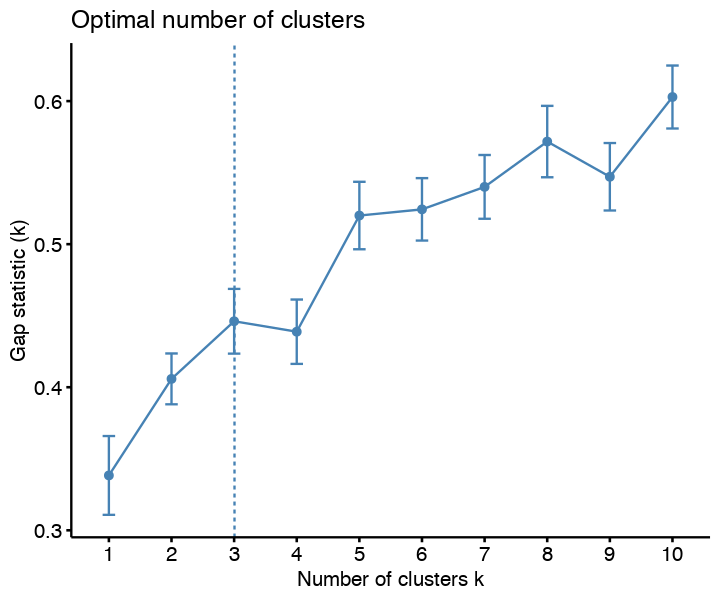

In [10]:
# Determining the optimal number of clusters for kMeans - Returns result of 3  
fviz_nbclust(df_avg_weather_by_country.rescaled, kmeans, method = "gap_stat")

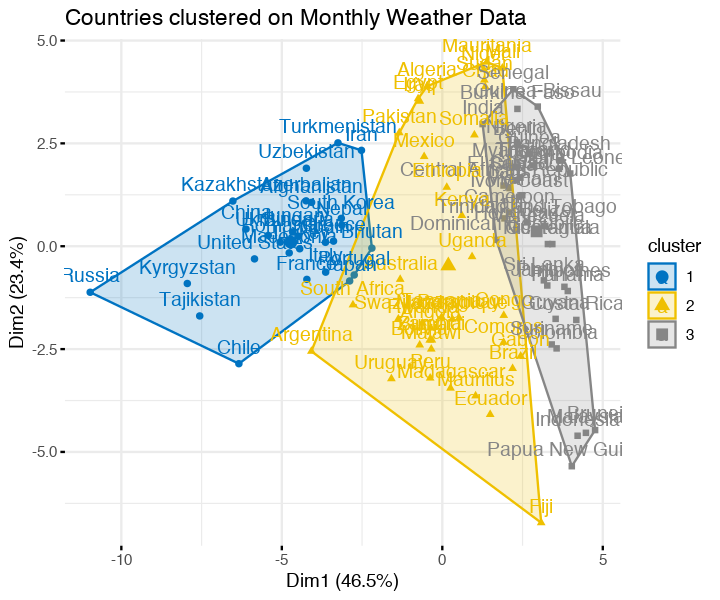

In [11]:
set.seed(123)
km.res <- kmeans(df_avg_weather_by_country.rescaled, 3, nstart = 25)

# Visualize
fviz_cluster(km.res, data = df_avg_weather_by_country.rescaled, palette = "jco", ggtheme = theme_minimal(),main="Countries clustered on Monthly Weather Data")


In [12]:
# Let us look at the centers of each cluster 
# Note that I have transformed the coordinates back to the original scale (Celsius and millimetres) 
# for ease of interpretation
cluster_centres = km.res$centers
cluster_centres[,1:12] = median_temp + (iqr_temp*cluster_centres[,1:12])
cluster_centres[,13:24] = median_rainfall + (iqr_rainfall*cluster_centres[,13:24])
cluster_centres

,AVG_TEMP_JAN,AVG_TEMP_FEB,AVG_TEMP_MAR,AVG_TEMP_APR,AVG_TEMP_MAY,AVG_TEMP_JUN,AVG_TEMP_JUL,AVG_TEMP_AUG,AVG_TEMP_SEP,AVG_TEMP_OCT,⋯,AVG_RF_MAR,AVG_RF_APR,AVG_RF_MAY,AVG_RF_JUN,AVG_RF_JUL,AVG_RF_AUG,AVG_RF_SEP,AVG_RF_OCT,AVG_RF_NOV,AVG_RF_DEC
1,-0.9139926,0.5358739,5.024352,10.34044,15.06090,19.14154,21.35687,20.93695,16.77355,11.37797,⋯,47.08572,55.26622,65.30166,73.90451,81.90675,71.98635,62.22901,52.70039,47.36561,46.13487
2,22.0704502,22.7675632,23.530497,23.85335,23.66198,23.05258,22.60924,23.11586,23.78542,23.88947,⋯,116.27366,92.40203,67.47556,45.38880,47.17030,49.98709,52.97540,70.15781,85.45955,102.15956
3,24.0359879,25.1488650,26.427381,27.23361,27.16674,26.63539,26.08088,25.93994,26.02402,25.98844,⋯,80.58824,115.69618,193.18361,218.55141,238.54135,257.61324,234.19366,203.93025,133.10986,98.25473


In [13]:
# Cluster 1 Countries
names(km.res$cluster[km.res$cluster==1])

[1] "Afghanistan"   "Azerbaijan"    "Bhutan"        "Bulgaria"     
 [5] "Chile"         "China"         "France"        "Greece"       
 [9] "Hungary"       "Iran"          "Italy"         "Japan"        
[13] "Kazakhstan"    "South Korea"   "Kyrgyzstan"    "Macedonia"    
[17] "Nepal"         "Portugal"      "Romania"       "Russia"       
[21] "Spain"         "Tajikistan"    "Turkey"        "Turkmenistan" 
[25] "Ukraine"       "United States" "Uzbekistan"

In [14]:
# Cluster 2 Countries
names(km.res$cluster[km.res$cluster==2])

[1] "Algeria"      "Angola"       "Argentina"    "Australia"    "Bolivia"     
 [6] "Brazil"       "Burundi"      "Chad"         "Comoros"      "Congo"       
[11] "Ecuador"      "Egypt"        "Ethiopia"     "Fiji"         "Gabon"       
[16] "Iraq"         "Kenya"        "Madagascar"   "Malawi"       "Mali"        
[21] "Mauritania"   "Mauritius"    "Mexico"       "Mozambique"   "Niger"       
[26] "Pakistan"     "Paraguay"     "Peru"         "Rwanda"       "Somalia"     
[31] "South Africa" "Sudan"        "Swaziland"    "Tanzania"     "Uganda"      
[36] "Uruguay"      "Zambia"

In [15]:
# Cluster 3 Countries
names(km.res$cluster[km.res$cluster==3])

[1] "Bangladesh"               "Belize"                  
 [3] "Benin"                    "Brunei"                  
 [5] "Burkina Faso"             "Cambodia"                
 [7] "Cameroon"                 "Central African Republic"
 [9] "Colombia"                 "Costa Rica"              
[11] "Ivory Coast"              "Cuba"                    
[13] "Dominican Republic"       "El Salvador"             
[15] "Ghana"                    "Guatemala"               
[17] "Guinea"                   "Guinea-Bissau"           
[19] "Guyana"                   "Haiti"                   
[21] "Honduras"                 "India"                   
[23] "Indonesia"                "Jamaica"                 
[25] "Laos"                     "Malaysia"                
[27] "Myanmar"                  "Nicaragua"               
[29] "Nigeria"                  "Panama"                  
[31] "Papua New Guinea"         "Philippines"             
[33] "Senegal"                  "Sierra Leone"            
[35] "Sri Lanka"                "Suriname"                
[37] "Thailand"                 "Togo"                    
[39] "Trinidad and Tobago"      "Venezuela"               
[41] "Vietnam"

# Cluster Analysis: Conclusion

Here are my interpretations for each cluster above:

Cluster 1: Very cold winters with constant low rainfall (27 countries - Europe, US, China, Korea, Japan)

Cluster 2: Warm all year round with good winter rainfall (37 countries - Principally South American and African countries. No European countries and only Asian are Iraq and Pakistan)

Cluster 3: Hot all year round and with very heavy summer rainfall (41 countries - Asian countries like Bangladesh, Cambodia, India, Thailand, Vietnam + African and South American)

NOTE: More work may needed to be done here. For example, countries in the southern hemisphere have their seasons inverted i.e. Summer weather is in December! It may therefore be more appropriate to switch their monthly data columns around so that everything is aligned?

# Rice Yield Cluster Analysis

Let us examine the rice yield in each cluster to see if there is any differences

In [16]:
# Append the cluster id to the master dataframe
df$cluster_id = NA

for (i in 1:3)
 {
  countries_in_cluster = names(km.res$cluster[km.res$cluster==i])
  df$cluster_id[df$COUNTRY %in% countries_in_cluster] = i 
 }


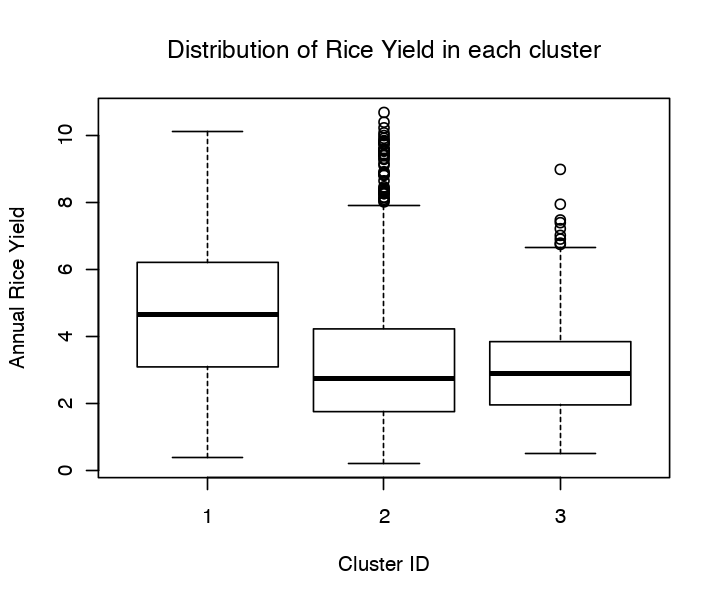

In [17]:
# Change plot size 
options(repr.plot.width=6, repr.plot.height=5)

# Simple boxplot of yield values in each cluster
boxplot(df$YIELD ~ df$cluster_id,xlab='Cluster ID',ylab='Annual Rice Yield',main='Distribution of Rice Yield in each cluster')


Surprisingly perhaps, the cluster with the highest median rice yield is cluster 1. These are the coldest countries with relatively little rainfall. As can be seen in the density plots below, it is bi-modal unlike the other two clusters.

Cluster 3, the hottest and wettest countries do not produce high rice yields! 


Rather than looking at rice yield, which essentially quantifies the efficiency of the rice growing process, let us instead look at the volumes of rice produced in the three clusters.

Below I show the distributions of the annual rice production in the three clusters and perhaps more informatively a  plot showing the mean rice production in these 3 clusters over 25 years.  

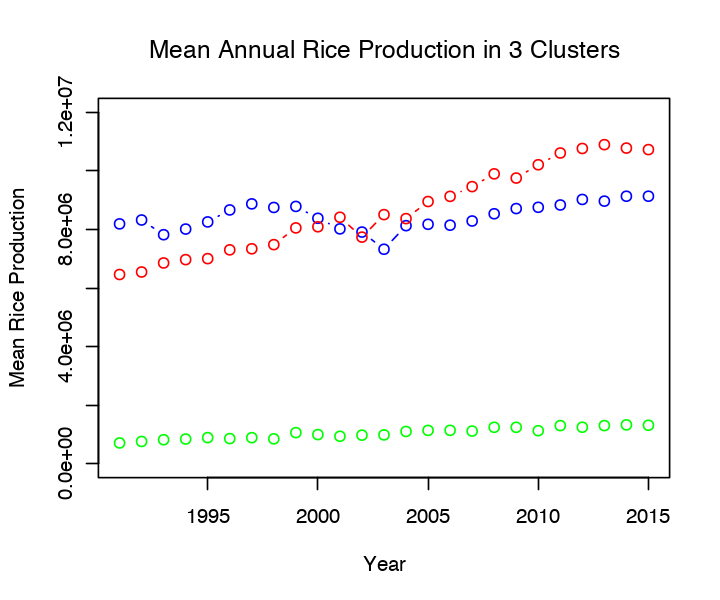

In [18]:
df_production = df
df_production=droplevels(df_production)

# Group by cluster and year and calculate mean rice production
df_avg_production = aggregate(df_production$PRODUCTION, by=list(df_production$cluster_id,df_production$YEAR), FUN=mean)

# Rename columns
names(df_avg_production) = c('cluster_id','YEAR','MEAN_CLUSTER_PRODUCTION')

# Plot Trend over Time chart for mean rice production in each cluster
cl1 = subset(df_avg_production,cluster_id==1)
cl2 = subset(df_avg_production,cluster_id==2)
cl3 = subset(df_avg_production,cluster_id==3)


plot(cl2$YEAR,cl2$MEAN_CLUSTER_PRODUCTION,type='b',col='green',ylim=c(0,12000000),xlab='Year',ylab='Mean Rice Production',main='Mean Annual Rice Production in 3 Clusters')
lines(cl1$YEAR,cl1$MEAN_CLUSTER_PRODUCTION,type='b',col='blue')
lines(cl3$YEAR,cl3$MEAN_CLUSTER_PRODUCTION,type='b',col='red')


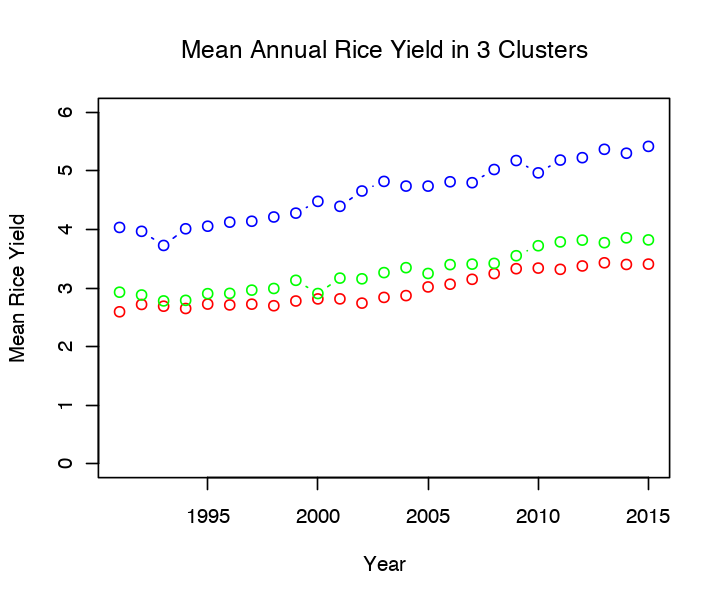

In [19]:
# Group by cluster and year and calculate mean rice yield
df_avg_yield = aggregate(df$YIELD, by=list(df$cluster_id,df$YEAR), FUN=mean)

# Rename columns
names(df_avg_yield) = c('cluster_id','YEAR','MEAN_CLUSTER_YIELD')

# Plot Trend over Time chart for mean rice production in each cluster
cl1 = subset(df_avg_yield,cluster_id==1)
cl2 = subset(df_avg_yield,cluster_id==2)
cl3 = subset(df_avg_yield,cluster_id==3)


plot(cl3$YEAR,cl3$MEAN_CLUSTER_YIELD,type='b',col='red',ylim=c(0,6),xlab='Year',ylab='Mean Rice Yield',main='Mean Annual Rice Yield in 3 Clusters')
lines(cl2$YEAR,cl2$MEAN_CLUSTER_YIELD,type='b',col='green')
lines(cl1$YEAR,cl1$MEAN_CLUSTER_YIELD,type='b',col='blue')


The above two plots are perhaps the most informative. The hot and very wet summers of cluster 3 countries produce the lowest yields, but they still produce the majority of the worlds rice!

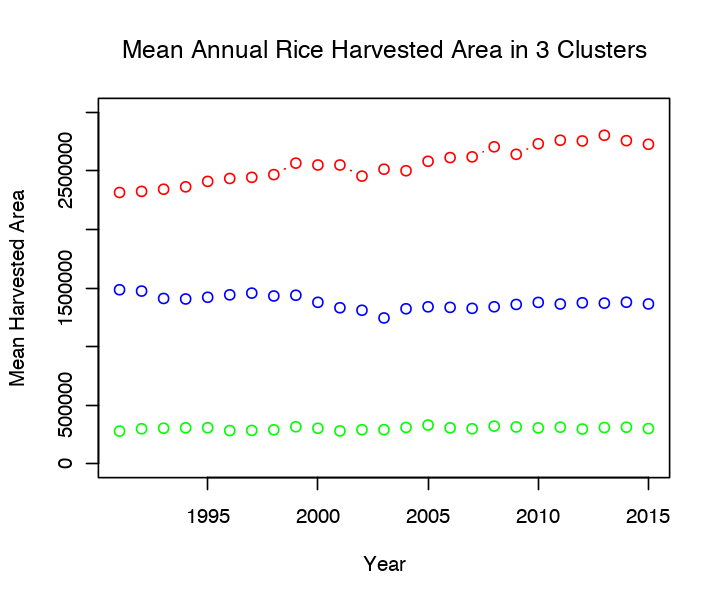

In [20]:
# Group by cluster and year and calculate mean rice yield
df_avg_harvest_area = aggregate(exp(df$HARV_AREA), by=list(df$cluster_id,df$YEAR), FUN=mean)

# Rename columns
names(df_avg_harvest_area) = c('cluster_id','YEAR','MEAN_CLUSTER_HARV_AREA')

# Plot Trend over Time chart for mean rice production in each cluster
cl1 = subset(df_avg_harvest_area,cluster_id==1)
cl2 = subset(df_avg_harvest_area,cluster_id==2)
cl3 = subset(df_avg_harvest_area,cluster_id==3)


plot(cl3$YEAR,cl3$MEAN_CLUSTER_HARV_AREA,type='b',col='red',ylim=c(0,3000000),xlab='Year',ylab='Mean Harvested Area',main='Mean Annual Rice Harvested Area in 3 Clusters')
lines(cl2$YEAR,cl2$MEAN_CLUSTER_HARV_AREA,type='b',col='green')
lines(cl1$YEAR,cl1$MEAN_CLUSTER_HARV_AREA,type='b',col='blue')


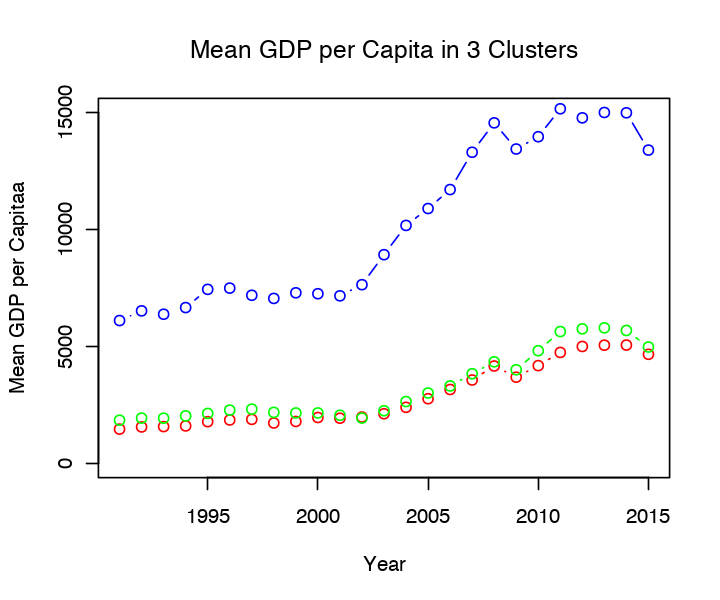

In [155]:
# Group by cluster and year and calculate mean rice yield
df_gdp_per_capita = aggregate(exp(df$GDP.PER.CAPITA), by=list(df$cluster_id,df$YEAR), FUN=mean)

# Rename columns
names(df_gdp_per_capita) = c('cluster_id','YEAR','MEAN_GDP_PER_CAPITA')

# Plot Trend over Time chart for mean rice production in each cluster
cl1 = subset(df_gdp_per_capita,cluster_id==1)
cl2 = subset(df_gdp_per_capita,cluster_id==2)
cl3 = subset(df_gdp_per_capita,cluster_id==3)


plot(cl3$YEAR,cl3$MEAN_GDP_PER_CAPITA,type='b',col='red',ylim=c(0,15000),xlab='Year',ylab='Mean GDP per Capitaa',main='Mean GDP per Capita in 3 Clusters')
lines(cl2$YEAR,cl2$MEAN_GDP_PER_CAPITA,type='b',col='green')
lines(cl1$YEAR,cl1$MEAN_GDP_PER_CAPITA,type='b',col='blue')


# Weather Effects on Rice Yield

Let us leave the clustering behind for now and focus on our main objective. That is, attempting to answer the question:

Does the weather affect the rice yield?

Here we detrend the rice yield to remove any long term systematic changes and attempt to build a model which predicts the detrended rice yield using rescaled weather data. 

Specifically, we calculate:

1. Detrended Rice Yield = Y / sd(Y) where Y = Rice Yield - SMA(Rice Yield)
2. Rescaled Weather Data = ( X_i - mean(X_i) )/sd(X_i)


In [21]:
# Create new data frame 
df_detrended = df
    
# Create data set for each cluster
df_cluster1 = subset(df_detrended,cluster_id==1)
df_cluster2 = subset(df_detrended,cluster_id==2)
df_cluster3 = subset(df_detrended,cluster_id==3)

# Multiple Linear Regression Model 

We attempt to build regression models that predict the average annual yield based on solely the monthly weather data.

We begin with building a model using ALL the 94 countries in our data set. Later we will build models on each of our individual clusters.

In [22]:
library("corrplot")

corrplot 0.84 loaded


,YEAR,LAND_AREA,HARV_AREA,FERT,GDP.PER.CAPITA,PRODUCTION
YEAR,1.0000000000,-0.0001664987,0.03498885,0.08221330,0.29238226,0.02886979
LAND_AREA,-0.0001664987,1.0000000000,0.24379820,0.03728675,0.20724086,0.34446182
HARV_AREA,0.0349888511,0.2437982017,1.00000000,0.13123451,-0.09357372,0.46542520
FERT,0.0822133002,0.0372867515,0.13123451,1.00000000,0.59521514,0.22037356
GDP.PER.CAPITA,0.2923822589,0.2072408573,-0.09357372,0.59521514,1.00000000,-0.04393487
PRODUCTION,0.0288697896,0.3444618202,0.46542520,0.22037356,-0.04393487,1.00000000


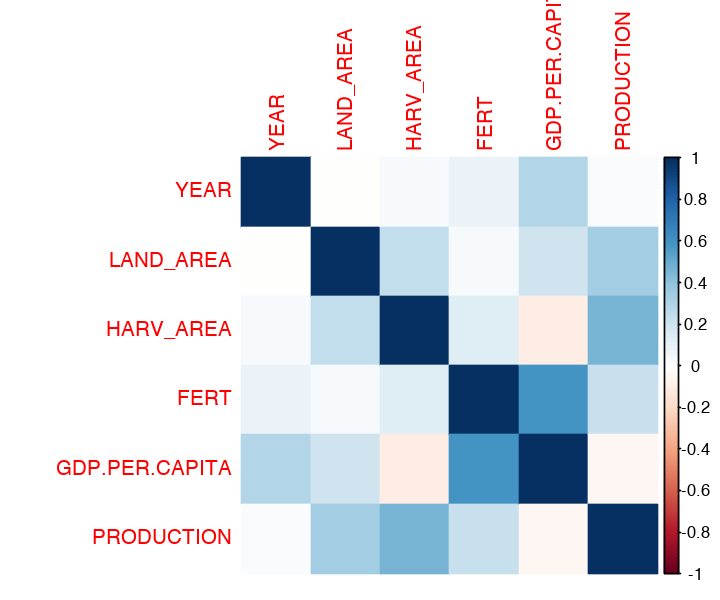

In [23]:
features = c('YEAR','LAND_AREA','HARV_AREA','FERT','GDP.PER.CAPITA','PRODUCTION')
M = cor(df_detrended[,features])

corrplot(M, method="color")
M


## We see a very strong correlation between production and harvested area!
## Also have a fairly strong correlation between Fertiliser and GDP per Capita

So we will drop Fertiliser!

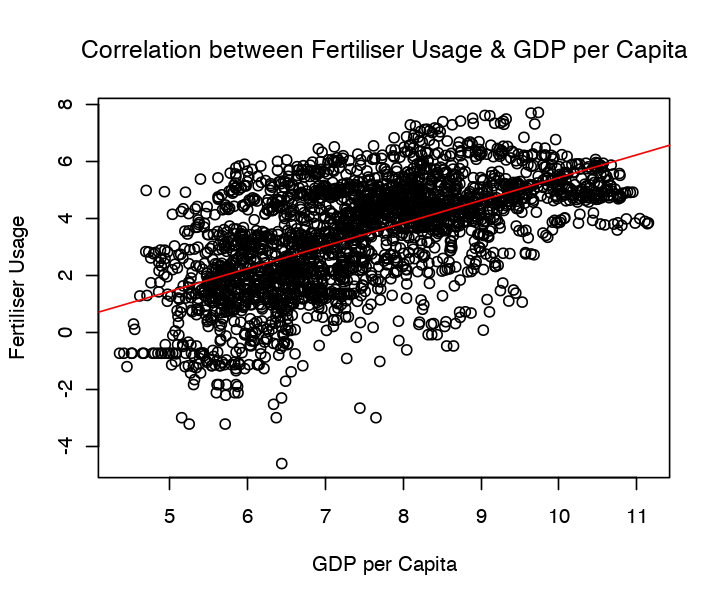

In [25]:
model = lm(FERT ~ GDP.PER.CAPITA, data = df_detrended)
plot(df_detrended$GDP.PER.CAPITA,df_detrended$FERT,xlab="GDP per Capita",ylab="Fertiliser Usage",main="Correlation between Fertiliser Usage & GDP per Capita")
abline(model,col='red')


,AVG_TEMP_JAN,AVG_TEMP_FEB,AVG_TEMP_MAR,AVG_TEMP_APR,AVG_TEMP_MAY,AVG_TEMP_JUN,AVG_TEMP_JUL,AVG_TEMP_AUG,AVG_TEMP_SEP,AVG_TEMP_OCT,AVG_TEMP_NOV,AVG_TEMP_DEC
AVG_TEMP_JAN,1.0000000,0.9902269,0.9691308,0.8883530,0.6976232,0.3836264,0.1756759,0.2690823,0.6687490,0.8971772,0.9734975,0.9908545
AVG_TEMP_FEB,0.9902269,1.0000000,0.9832534,0.9156928,0.7402558,0.4359824,0.2271438,0.3149231,0.7032282,0.9165378,0.9800596,0.9877670
AVG_TEMP_MAR,0.9691308,0.9832534,1.0000000,0.9590232,0.8185680,0.5409684,0.3352268,0.4137415,0.7735453,0.9484334,0.9826208,0.9721719
AVG_TEMP_APR,0.8883530,0.9156928,0.9590232,1.0000000,0.9314911,0.7237244,0.5405500,0.5992836,0.8797265,0.9689914,0.9426613,0.9011576
AVG_TEMP_MAY,0.6976232,0.7402558,0.8185680,0.9314911,1.0000000,0.9091572,0.7806134,0.8131090,0.9487376,0.9059326,0.8013258,0.7209710
AVG_TEMP_JUN,0.3836264,0.4359824,0.5409684,0.7237244,0.9091572,1.0000000,0.9572687,0.9534645,0.9039368,0.7096984,0.5255077,0.4143652
AVG_TEMP_JUL,0.1756759,0.2271438,0.3352268,0.5405500,0.7806134,0.9572687,1.0000000,0.9765579,0.8162655,0.5440026,0.3282432,0.2076701
AVG_TEMP_AUG,0.2690823,0.3149231,0.4137415,0.5992836,0.8131090,0.9534645,0.9765579,1.0000000,0.8717326,0.6251509,0.4196964,0.3018234
AVG_TEMP_SEP,0.6687490,0.7032282,0.7735453,0.8797265,0.9487376,0.9039368,0.8162655,0.8717326,1.0000000,0.9099546,0.7802211,0.6948948
AVG_TEMP_OCT,0.8971772,0.9165378,0.9484334,0.9689914,0.9059326,0.7096984,0.5440026,0.6251509,0.9099546,1.0000000,0.9570749,0.9119624


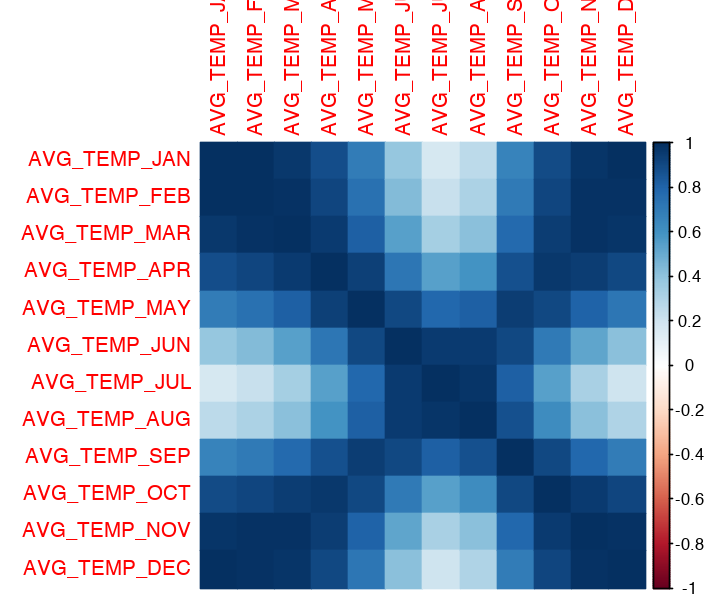

In [612]:
features = c('AVG_TEMP_JAN','AVG_TEMP_FEB','AVG_TEMP_MAR','AVG_TEMP_APR','AVG_TEMP_MAY','AVG_TEMP_JUN',
             'AVG_TEMP_JUL','AVG_TEMP_AUG','AVG_TEMP_SEP','AVG_TEMP_OCT','AVG_TEMP_NOV','AVG_TEMP_DEC')

M = cor(df_detrended[,features])

corrplot(M, method="color")
M


,AVG_RF_JAN,AVG_RF_FEB,AVG_RF_MAR,AVG_RF_APR,AVG_RF_MAY,AVG_RF_JUN,AVG_RF_JUL,AVG_RF_AUG,AVG_RF_SEP,AVG_RF_OCT,AVG_RF_NOV,AVG_RF_DEC
AVG_RF_JAN,1.00000000,0.783229166,0.76799490,0.5428852,0.2385790,0.016813733,-0.083356868,-0.13455969,-0.08556526,0.1738835,0.4625317,0.715424949
AVG_RF_FEB,0.78322917,1.000000000,0.78732237,0.5482898,0.2320892,0.006326459,-0.093168367,-0.14932232,-0.10070351,0.1129844,0.4035589,0.650125595
AVG_RF_MAR,0.76799490,0.787322372,1.00000000,0.6513261,0.3130716,0.060947884,-0.044337345,-0.08244471,-0.02095176,0.1988177,0.4629699,0.676401580
AVG_RF_APR,0.54288518,0.548289828,0.65132607,1.0000000,0.5460057,0.319616761,0.222907740,0.16380374,0.20849948,0.3964181,0.5155476,0.565159267
AVG_RF_MAY,0.23857895,0.232089221,0.31307165,0.5460057,1.0000000,0.676829844,0.588620872,0.49696831,0.54879809,0.5938594,0.5017824,0.369036854
AVG_RF_JUN,0.01681373,0.006326459,0.06094788,0.3196168,0.6768298,1.000000000,0.816629780,0.73376787,0.69362263,0.5625406,0.2633809,0.095459472
AVG_RF_JUL,-0.08335687,-0.093168367,-0.04433735,0.2229077,0.5886209,0.816629780,1.000000000,0.83630090,0.75497287,0.5185715,0.1784072,-0.004425758
AVG_RF_AUG,-0.13455969,-0.149322317,-0.08244471,0.1638037,0.4969683,0.733767870,0.836300895,1.00000000,0.81330020,0.5235561,0.1414958,-0.055025709
AVG_RF_SEP,-0.08556526,-0.100703513,-0.02095176,0.2084995,0.5487981,0.693622627,0.754972868,0.81330020,1.00000000,0.6396300,0.2984792,0.039690707
AVG_RF_OCT,0.17388352,0.112984407,0.19881767,0.3964181,0.5938594,0.562540571,0.518571463,0.52355606,0.63962998,1.0000000,0.6149429,0.363979864


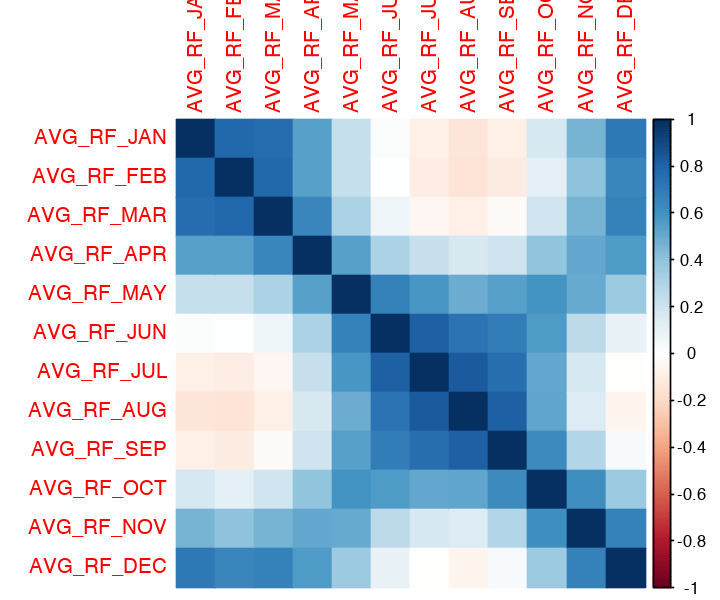

In [35]:
features = c('AVG_RF_JAN','AVG_RF_FEB','AVG_RF_MAR','AVG_RF_APR','AVG_RF_MAY','AVG_RF_JUN',
             'AVG_RF_JUL','AVG_RF_AUG','AVG_RF_SEP','AVG_RF_OCT','AVG_RF_NOV','AVG_RF_DEC')

M = cor(df_detrended[,features])

corrplot(M, method="color")
M

# Strong Correlations

Removing variables with |r|>0.7, we are left with the following weather variables:

- AVG_TEMP_JAN
- AVG_TEMP_JUL
- AVG_RF_FEB
- AVG_RF_APR
- AVG_RF_JUN
- AVG_RF_SEP
- AVG_RF_DEC

Based on the strong correlations, it seems more prudent to switch to quarterly weather data for the linear regression analysis where strong correlations only exist in the quarterly temperatures.

Will therefore use the following sets of weather features in the linear regression analysis:


In [613]:
features=c('AVG_Q1_TEMP','AVG_Q2_TEMP','AVG_Q3_TEMP','AVG_Q4_TEMP','AVG_Q1_RF','AVG_Q2_RF','AVG_Q3_RF','AVG_Q4_RF')

M = cor(df_detrended[,features])

M

,AVG_Q1_TEMP,AVG_Q2_TEMP,AVG_Q3_TEMP,AVG_Q4_TEMP,AVG_Q1_RF,AVG_Q2_RF,AVG_Q3_RF,AVG_Q4_RF
AVG_Q1_TEMP,1.0000000,0.77334471,0.44957640,0.9869669,0.27041892,0.3642407,0.3409942,0.38752315
AVG_Q2_TEMP,0.7733447,1.00000000,0.88088090,0.8261300,-0.03343223,0.2502602,0.3902724,0.18129327
AVG_Q3_TEMP,0.4495764,0.88088090,1.00000000,0.5434237,-0.14992979,0.1431089,0.2714817,0.08033905
AVG_Q4_TEMP,0.9869669,0.82612997,0.54342366,1.0000000,0.25670987,0.3529257,0.3377851,0.37444372
AVG_Q1_RF,0.2704189,-0.03343223,-0.14992979,0.2567099,1.00000000,0.3428225,-0.1065948,0.53777780
AVG_Q2_RF,0.3642407,0.25026016,0.14310891,0.3529257,0.34282249,1.0000000,0.6769597,0.61754102
AVG_Q3_RF,0.3409942,0.39027238,0.27148173,0.3377851,-0.10659480,0.6769597,1.0000000,0.34100185
AVG_Q4_RF,0.3875232,0.18129327,0.08033905,0.3744437,0.53777780,0.6175410,0.3410018,1.00000000


We still see strong correlations in the quarterly temperatures. So I will work with 2 sets for linear regression:

- AVG_Q1_TEMP
- AVG_Q3_TEMP
- AVG_Q1_RF
- AVG_Q2_RF
- AVG_Q3_RF
- AVG_Q4_RF


In [42]:
features=c('AVG_Q1_TEMP','AVG_Q3_TEMP','AVG_Q1_RF','AVG_Q2_RF','AVG_Q3_RF','AVG_Q4_RF')

M = cor(df_detrended[,features])

M

,AVG_Q1_TEMP,AVG_Q3_TEMP,AVG_Q1_RF,AVG_Q2_RF,AVG_Q3_RF,AVG_Q4_RF
AVG_Q1_TEMP,1.0000000,0.4480372,0.2770781,0.3721906,0.3468198,0.3948785
AVG_Q3_TEMP,0.4480372,1.0000000,-0.1345306,0.1717557,0.2875671,0.1033258
AVG_Q1_RF,0.2770781,-0.1345306,1.0000000,0.3400119,-0.1040721,0.5379594
AVG_Q2_RF,0.3721906,0.1717557,0.3400119,1.0000000,0.6809849,0.6157944
AVG_Q3_RF,0.3468198,0.2875671,-0.1040721,0.6809849,1.0000000,0.3416618
AVG_Q4_RF,0.3948785,0.1033258,0.5379594,0.6157944,0.3416618,1.0000000


In [147]:
features=c('AVG_Q1_TEMP','AVG_Q2_TEMP','AVG_Q3_TEMP','AVG_Q4_TEMP','AVG_Q1_RF','AVG_Q2_RF','AVG_Q3_RF','AVG_Q4_RF')

M = cor(df_cluster3[,features])

M

,AVG_Q1_TEMP,AVG_Q2_TEMP,AVG_Q3_TEMP,AVG_Q4_TEMP,AVG_Q1_RF,AVG_Q2_RF,AVG_Q3_RF,AVG_Q4_RF
AVG_Q1_TEMP,1.000000000,0.47926165,-0.005258213,0.8714128,-0.01652342,-0.2024646,-0.22664692,-0.13220575
AVG_Q2_TEMP,0.479261652,1.00000000,0.595515955,0.4882691,-0.43712106,-0.6135235,-0.04950032,-0.51013919
AVG_Q3_TEMP,-0.005258213,0.59551595,1.000000000,0.2899172,-0.16184894,-0.2963168,-0.20857397,-0.17820208
AVG_Q4_TEMP,0.871412840,0.48826912,0.289917153,1.0000000,0.10099765,-0.1931754,-0.35935440,-0.12997258
AVG_Q1_RF,-0.016523422,-0.43712106,-0.161848936,0.1009976,1.00000000,0.5282599,-0.20692444,0.60107728
AVG_Q2_RF,-0.202464632,-0.61352347,-0.296316791,-0.1931754,0.52825987,1.0000000,0.19749605,0.48247253
AVG_Q3_RF,-0.226646920,-0.04950032,-0.208573975,-0.3593544,-0.20692444,0.1974960,1.00000000,0.01064286
AVG_Q4_RF,-0.132205753,-0.51013919,-0.178202081,-0.1299726,0.60107728,0.4824725,0.01064286,1.00000000


# Linear Regression Analysis

Please see following link that outlines best subset approach

http://www.sthda.com/english/articles/37-model-selection-essentials-in-r/155-best-subsets-regression-essentials-in-r/


In [28]:
library(tidyverse)
library(caret)
library(leaps)
library(QuantPsyc)

In [29]:
# id: model id
# object: regsubsets object
# data: data used to fit regsubsets
# outcome: outcome variable
get_model_formula <- function(id, object, outcome){
  # get models data
  models <- summary(object)$which[id,-1]
  # Get outcome variable
  #form <- as.formula(object$call[[2]])
  #outcome <- all.vars(form)[1]
  # Get model predictors
  predictors <- names(which(models == TRUE))
  predictors <- paste(predictors, collapse = "+")
  # Build model formula
  as.formula(paste0(outcome, "~", predictors))
}

get_cv_error <- function(model.formula, data){
  set.seed(1)
  train.control <- trainControl(method = "cv", number = 10)
  cv <- train(model.formula, data = data, method = "lm",
              trControl = train.control)
  cv$results$RMSE
}

In [93]:
#
# Data set to be fitted
#
dataset = df_cluster3

# Find best models from size 1->numVars variables
numVars = 9

# YIELD ~ YEAR+HARV_AREA+FERT+GDP.PER.CAPITA+AVG_Q1_TEMP+AVG_Q3_TEMP+AVG_Q1_RF+AVG_Q2_RF+AVG_Q3_RF+AVG_Q4_RF
models <- regsubsets(YIELD ~ YEAR+HARV_AREA+GDP.PER.CAPITA+AVG_Q1_TEMP+AVG_Q3_TEMP+AVG_Q1_RF+AVG_Q2_RF+AVG_Q3_RF+AVG_Q4_RF, data = dataset, nvmax = numVars)
#summary(models)



In [94]:
# Print out which model has besy adjusted R^2
res.sum <- summary(models)
best.Adj.R2.model.id = which.max(res.sum$adjr2)
best.CP.model.id = which.min(res.sum$cp)
best.BIC.model.id = which.min(res.sum$bic)
print(paste("Best Adj.R2 Model ID:",best.Adj.R2.model.id))
print(paste("Best CP Model ID:",best.CP.model.id))
print(paste("Best BIC Model ID:",best.BIC.model.id))

[1] "Best Adj.R2 Model ID: 8"
[1] "Best CP Model ID: 8"
[1] "Best BIC Model ID: 7"


In [97]:
get_model_formula(best.Adj.R2.model.id, models, "YIELD")

YIELD ~ YEAR + HARV_AREA + GDP.PER.CAPITA + AVG_Q1_TEMP + AVG_Q3_TEMP + 
    AVG_Q1_RF + AVG_Q2_RF + AVG_Q3_RF
<environment: 0x7fcddcaa1660>

In [96]:
# Accuracy (RMSE) as evaluated using 10-fold cross validation
get_cv_error(get_model_formula(best.Adj.R2.model.id, models, "YIELD"), dataset)

[1] 1.06737

# All Countries

10-fold cross validated RMSE = 1.44694999454128


In [144]:
model = lm(YIELD ~ YEAR + HARV_AREA + GDP.PER.CAPITA + AVG_Q1_TEMP + AVG_Q3_TEMP + AVG_Q1_RF + AVG_Q2_RF + AVG_Q3_RF + AVG_Q4_RF, data = df_detrended)
summary(model)

lm.beta(model)


Call:
lm(formula = YIELD ~ YEAR + HARV_AREA + GDP.PER.CAPITA + AVG_Q1_TEMP + 
    AVG_Q3_TEMP + AVG_Q1_RF + AVG_Q2_RF + AVG_Q3_RF + AVG_Q4_RF, 
    data = df_detrended)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2855 -0.9277 -0.0747  0.7974  7.1195 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -2.154e+01  8.268e+00  -2.605 0.009250 ** 
YEAR            9.813e-03  4.167e-03   2.355 0.018590 *  
HARV_AREA       1.600e-01  1.069e-02  14.968  < 2e-16 ***
GDP.PER.CAPITA  7.063e-01  2.362e-02  29.908  < 2e-16 ***
AVG_Q1_TEMP    -1.058e-02  3.515e-03  -3.010 0.002636 ** 
AVG_Q3_TEMP    -3.749e-02  7.078e-03  -5.296 1.28e-07 ***
AVG_Q1_RF      -3.496e-03  4.605e-04  -7.591 4.40e-14 ***
AVG_Q2_RF       2.057e-03  5.825e-04   3.532 0.000419 ***
AVG_Q3_RF      -2.972e-03  3.943e-04  -7.539 6.49e-14 ***
AVG_Q4_RF      -1.437e-03  4.954e-04  -2.901 0.003754 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standa

YEAR      HARV_AREA GDP.PER.CAPITA    AVG_Q1_TEMP    AVG_Q3_TEMP 
    0.03732004     0.23674988     0.52958747    -0.06038305    -0.09448202 
     AVG_Q1_RF      AVG_Q2_RF      AVG_Q3_RF      AVG_Q4_RF 
   -0.16117500     0.09221688    -0.18690237    -0.06449330

In [147]:
#hist(model$residuals,breaks=30)
#shapiro.test(model$residuals)
#plot(model$fitted,model$residuals)

In [50]:
model = lm(YIELD ~ HARV_AREA + GDP.PER.CAPITA + AVG_Q3_TEMP + AVG_Q1_RF + AVG_Q3_RF, data = df_detrended)
summary(model)

lm.beta(model)


Call:
lm(formula = YIELD ~ HARV_AREA + GDP.PER.CAPITA + AVG_Q3_TEMP + 
    AVG_Q1_RF + AVG_Q3_RF, data = df_detrended)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1047 -0.9415 -0.1045  0.8283  7.3418 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -2.1092697  0.2659536  -7.931 3.19e-15 ***
HARV_AREA       0.1686749  0.0105669  15.963  < 2e-16 ***
GDP.PER.CAPITA  0.7357675  0.0208360  35.312  < 2e-16 ***
AVG_Q3_TEMP    -0.0464840  0.0063866  -7.278 4.44e-13 ***
AVG_Q1_RF      -0.0039541  0.0003328 -11.883  < 2e-16 ***
AVG_Q3_RF      -0.0026099  0.0002556 -10.211  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.454 on 2619 degrees of freedom
Multiple R-squared:  0.4134,	Adjusted R-squared:  0.4122 
F-statistic: 369.1 on 5 and 2619 DF,  p-value: < 2.2e-16


HARV_AREA GDP.PER.CAPITA    AVG_Q3_TEMP      AVG_Q1_RF      AVG_Q3_RF 
     0.2496554      0.5516904     -0.1171564     -0.1823089     -0.1641059

# Cluster 1

10-fold cross validated RMSE = 1.15821400078178


In [56]:
model = lm(YIELD ~ YEAR + HARV_AREA + GDP.PER.CAPITA + AVG_Q1_TEMP + AVG_Q3_TEMP + AVG_Q1_RF + AVG_Q2_RF + AVG_Q3_RF + AVG_Q4_RF, data = df_cluster1)
summary(model)

lm.beta(model)


Call:
lm(formula = YIELD ~ YEAR + HARV_AREA + GDP.PER.CAPITA + AVG_Q1_TEMP + 
    AVG_Q3_TEMP + AVG_Q1_RF + AVG_Q2_RF + AVG_Q3_RF + AVG_Q4_RF, 
    data = df_cluster1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0659 -0.6933 -0.1634  0.7267  7.2038 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -51.518034  13.397273  -3.845 0.000132 ***
YEAR             0.024034   0.006734   3.569 0.000384 ***
HARV_AREA        0.280620   0.021877  12.827  < 2e-16 ***
GDP.PER.CAPITA   0.573510   0.038811  14.777  < 2e-16 ***
AVG_Q1_TEMP      0.012863   0.007389   1.741 0.082169 .  
AVG_Q3_TEMP     -0.029953   0.010751  -2.786 0.005489 ** 
AVG_Q1_RF        0.009841   0.002380   4.135 4.01e-05 ***
AVG_Q2_RF        0.002273   0.001968   1.155 0.248474    
AVG_Q3_RF       -0.004112   0.001088  -3.780 0.000171 ***
AVG_Q4_RF        0.009543   0.002171   4.395 1.29e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standar

YEAR      HARV_AREA GDP.PER.CAPITA    AVG_Q1_TEMP    AVG_Q3_TEMP 
    0.09239943     0.34768453     0.48520947     0.04692202    -0.07339824 
     AVG_Q1_RF      AVG_Q2_RF      AVG_Q3_RF      AVG_Q4_RF 
    0.12494129     0.05915211    -0.19606257     0.16058938

In [73]:
model = lm(YIELD ~ HARV_AREA + GDP.PER.CAPITA + AVG_Q1_RF + AVG_Q3_RF, data = df_cluster1)
summary(model)

lm.beta(model)


Call:
lm(formula = YIELD ~ HARV_AREA + GDP.PER.CAPITA + AVG_Q1_RF + 
    AVG_Q3_RF, data = df_cluster1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1976 -0.7322 -0.0844  0.7648  7.2349 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -4.2949500  0.3057816 -14.046  < 2e-16 ***
HARV_AREA       0.2360048  0.0208463  11.321  < 2e-16 ***
GDP.PER.CAPITA  0.7014526  0.0313761  22.356  < 2e-16 ***
AVG_Q1_RF       0.0157004  0.0020824   7.539 1.54e-13 ***
AVG_Q3_RF      -0.0021231  0.0005391  -3.938 9.08e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.185 on 670 degrees of freedom
Multiple R-squared:  0.604,	Adjusted R-squared:  0.6017 
F-statistic: 255.5 on 4 and 670 DF,  p-value: < 2.2e-16


HARV_AREA GDP.PER.CAPITA      AVG_Q1_RF      AVG_Q3_RF 
     0.2924072      0.5934536      0.1993395     -0.1012270

# Cluster 2

10-fold cross validated RMSE = 1.70430592554052


In [79]:
model = lm(YIELD ~ YEAR + HARV_AREA + GDP.PER.CAPITA + AVG_Q1_TEMP + AVG_Q3_TEMP + AVG_Q1_RF + AVG_Q2_RF + AVG_Q3_RF + AVG_Q4_RF, data = df_cluster2)
summary(model)

lm.beta(model)


Call:
lm(formula = YIELD ~ YEAR + HARV_AREA + GDP.PER.CAPITA + AVG_Q1_TEMP + 
    AVG_Q3_TEMP + AVG_Q1_RF + AVG_Q2_RF + AVG_Q3_RF + AVG_Q4_RF, 
    data = df_cluster2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3728 -1.0988 -0.3309  0.9578  5.6688 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -2.727e+01  1.640e+01  -1.663   0.0966 .  
YEAR            1.370e-02  8.290e-03   1.653   0.0987 .  
HARV_AREA       1.307e-01  2.152e-02   6.072 1.84e-09 ***
GDP.PER.CAPITA  7.333e-01  4.795e-02  15.294  < 2e-16 ***
AVG_Q1_TEMP    -3.148e-02  1.653e-02  -1.905   0.0571 .  
AVG_Q3_TEMP    -7.621e-02  1.254e-02  -6.076 1.81e-09 ***
AVG_Q1_RF      -4.874e-03  7.874e-04  -6.190 9.05e-10 ***
AVG_Q2_RF       3.423e-03  1.457e-03   2.350   0.0190 *  
AVG_Q3_RF      -2.950e-03  1.594e-03  -1.851   0.0645 .  
AVG_Q4_RF      -6.075e-03  1.243e-03  -4.887 1.21e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standar

YEAR      HARV_AREA GDP.PER.CAPITA    AVG_Q1_TEMP    AVG_Q3_TEMP 
    0.04644281     0.16536513     0.46842950    -0.05686348    -0.19691067 
     AVG_Q1_RF      AVG_Q2_RF      AVG_Q3_RF      AVG_Q4_RF 
   -0.23822076     0.10479691    -0.06185551    -0.19879294

In [130]:
model = lm(YIELD ~ HARV_AREA + GDP.PER.CAPITA + AVG_Q3_TEMP + AVG_Q1_RF, data = df_cluster2)
summary(model)
lm.beta(model)



Call:
lm(formula = YIELD ~ HARV_AREA + GDP.PER.CAPITA + AVG_Q3_TEMP + 
    AVG_Q1_RF, data = df_cluster2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6486 -1.1393 -0.2925  0.9484  5.9751 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -1.5634856  0.5592055  -2.796  0.00528 ** 
HARV_AREA       0.1457065  0.0211526   6.888 1.05e-11 ***
GDP.PER.CAPITA  0.7662327  0.0449392  17.050  < 2e-16 ***
AVG_Q3_TEMP    -0.0591076  0.0120517  -4.904 1.11e-06 ***
AVG_Q1_RF      -0.0066422  0.0006042 -10.994  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.728 on 920 degrees of freedom
Multiple R-squared:  0.3437,	Adjusted R-squared:  0.3408 
F-statistic: 120.4 on 4 and 920 DF,  p-value: < 2.2e-16


HARV_AREA GDP.PER.CAPITA    AVG_Q3_TEMP      AVG_Q1_RF 
     0.1843513      0.4894498     -0.1527313     -0.3246210

# Cluster 3

10-fold cross validated RMSE = 1.0673699151172


In [98]:
model = lm(YIELD ~ YEAR + HARV_AREA + GDP.PER.CAPITA + AVG_Q1_TEMP + AVG_Q3_TEMP + AVG_Q1_RF + AVG_Q2_RF + AVG_Q3_RF, data = df_cluster3)
summary(model)

lm.beta(model)


Call:
lm(formula = YIELD ~ YEAR + HARV_AREA + GDP.PER.CAPITA + AVG_Q1_TEMP + 
    AVG_Q3_TEMP + AVG_Q1_RF + AVG_Q2_RF + AVG_Q3_RF, data = df_cluster3)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8408 -0.6890 -0.0971  0.6480  5.8122 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -5.226e+01  1.010e+01  -5.176 2.73e-07 ***
YEAR            2.954e-02  5.129e-03   5.759 1.12e-08 ***
HARV_AREA       1.000e-01  1.266e-02   7.901 7.14e-15 ***
GDP.PER.CAPITA  2.272e-01  3.962e-02   5.736 1.28e-08 ***
AVG_Q1_TEMP    -1.923e-01  1.567e-02 -12.270  < 2e-16 ***
AVG_Q3_TEMP    -7.096e-02  3.247e-02  -2.186 0.029071 *  
AVG_Q1_RF      -1.730e-03  5.140e-04  -3.366 0.000791 ***
AVG_Q2_RF       4.097e-03  5.892e-04   6.954 6.36e-12 ***
AVG_Q3_RF      -2.689e-03  4.212e-04  -6.384 2.62e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.066 on 1016 degrees of freedom
Multiple R-squared:  0.3173,	Adju

YEAR      HARV_AREA GDP.PER.CAPITA    AVG_Q1_TEMP    AVG_Q3_TEMP 
    0.16581813     0.23566651     0.20059637    -0.33750414    -0.06398685 
     AVG_Q1_RF      AVG_Q2_RF      AVG_Q3_RF 
   -0.11630669     0.24417651    -0.19284699

In [109]:
model = lm(YIELD ~ HARV_AREA + GDP.PER.CAPITA + AVG_Q1_TEMP + AVG_Q2_RF, data = df_cluster3)
summary(model)

lm.beta(model)


Call:
lm(formula = YIELD ~ HARV_AREA + GDP.PER.CAPITA + AVG_Q1_TEMP + 
    AVG_Q2_RF, data = df_cluster3)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2745 -0.6863 -0.1304  0.6745  5.7870 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.340902   0.544887   6.131 1.24e-09 ***
HARV_AREA       0.102786   0.012268   8.379  < 2e-16 ***
GDP.PER.CAPITA  0.314305   0.034243   9.179  < 2e-16 ***
AVG_Q1_TEMP    -0.170121   0.015803 -10.765  < 2e-16 ***
AVG_Q2_RF       0.002469   0.000488   5.061 4.95e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.1 on 1020 degrees of freedom
Multiple R-squared:  0.2698,	Adjusted R-squared:  0.2669 
F-statistic: 94.22 on 4 and 1020 DF,  p-value: < 2.2e-16


HARV_AREA GDP.PER.CAPITA    AVG_Q1_TEMP      AVG_Q2_RF 
     0.2422318      0.2774722     -0.2986488      0.1471739

### Brunei and Trinidad Outlier issue!

We have the above two countries causing GDP per capita to be negatively correlated with rice yield! Here I remove these outliers and redo the calculation for cluster 3

# Conclusion: Linear Regression

1. The global data set produces a model where all the input variables are statistically significant. Year, harvested area, GDP per capita, fertiliser usage and Q2 Rainfall are all positively related to rice yield, with all the remaining weather variables negatively correlated (That's bad, no? Considering global warming predicts higher temps and more rainfall?).    
2. However, this global model is too crude. In fact the model accuracy significantly improves by first categorising countries by climate. We go from having an RMSE of 1.486 on the global datset to RMSE values of 1.176, 1.423 and 1.034 for the three climate clusters.
3. The models trained on each cluster have quite distinct characteristics:
  - In the cold climates, GDP per capita has by far the most predictive power (See figure) while temperature has little (GDP +, Fert+, Q3- & Q4+ Rainfall)
  - Warm climate, again GDP per capita and fertiliser use are critical to a good yield. Rainfall in Q1- and temperature in Q3- are also significant
  - Hot climates: Adjusted R^2 is a disappointing 0.337. What is noteworthy is that fertiliser and GDP per capita are much weaker predictors in this group (which may explain the drop in R^2?). Instead, the year is a strong feature here along with the Q1 temperature (-) and Q2 rainfall (+). In fact it is in this group that the weather plays the most dominant role in determining rice yield. It is also curious that GDP per capita has a negative impact on yield! This anomaly is due to an outlier ... two countries with high GDP but low rice yield (See figure). Those countries are Brunei and Trinidad & Tobago!
  
### The Big Picture

It is interesting to note that in all the models built, the majority of the weather variables are, in all cases but one, negatively correlated with rice yield! For example, in our global model, five of the six are negatively correlated.


In [273]:
model = lm(YIELD ~ FERT, data = df_cluster1)
summary(model)



Call:
lm(formula = YIELD ~ FERT, data = df_cluster1)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7081 -1.0685 -0.1142  1.0380  5.1289 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.6894297  0.0911089   40.49   <2e-16 ***
FERT        0.0075075  0.0005048   14.87   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.581 on 565 degrees of freedom
Multiple R-squared:  0.2813,	Adjusted R-squared:  0.2801 
F-statistic: 221.2 on 1 and 565 DF,  p-value: < 2.2e-16


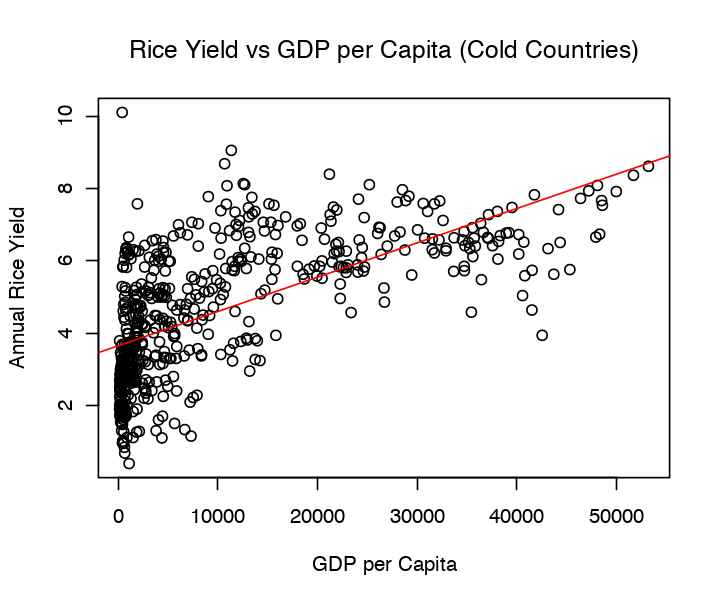

In [459]:
model = lm(YIELD ~ GDP.PER.CAPITA, data = df_cluster1)
plot(df_cluster1$GDP.PER.CAPITA,df_cluster1$YIELD,xlab="GDP per Capita",ylab="Annual Rice Yield",main="Rice Yield vs GDP per Capita (Cold Countries)")
abline(model,col='red')


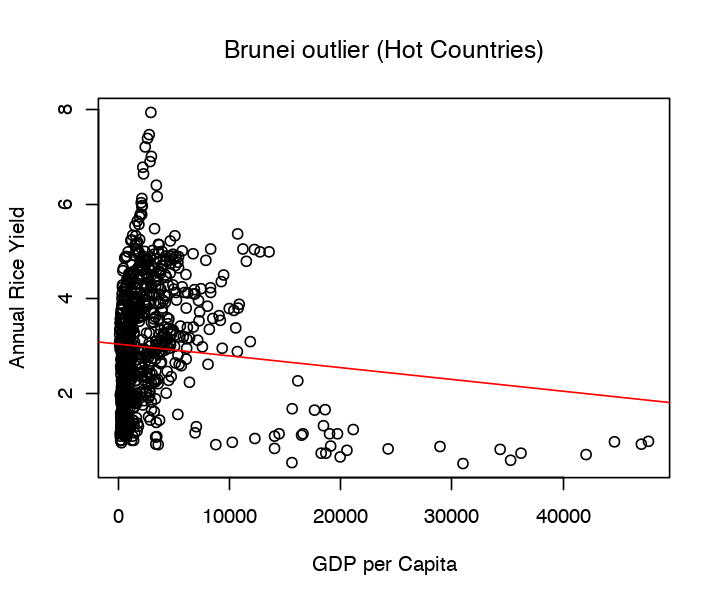

In [470]:
#model = lm(YIELD ~ YEAR + GDP.PER.CAPITA + AVG_Q1_TEMP + AVG_Q2_RF, data = df_cluster3)
model = lm(YIELD ~ GDP.PER.CAPITA, data = df_cluster3)

plot(df_cluster3$GDP.PER.CAPITA,df_cluster3$YIELD,xlab="GDP per Capita",ylab="Annual Rice Yield",main="Brunei outlier (Hot Countries)")
abline(model,col='red')

In [474]:
head(df_cluster3[order(df_cluster3$GDP.PER.CAPITA,decreasing=T),c('COUNTRY','GDP.PER.CAPITA','YIELD')])

,COUNTRY,GDP.PER.CAPITA,YIELD
347,Brunei,47651.13,0.98
346,Brunei,47015.68,0.92
348,Brunei,44598.08,0.97
343,Brunei,42053.05,0.70
342,Brunei,36201.54,0.73
345,Brunei,35267.45,0.58


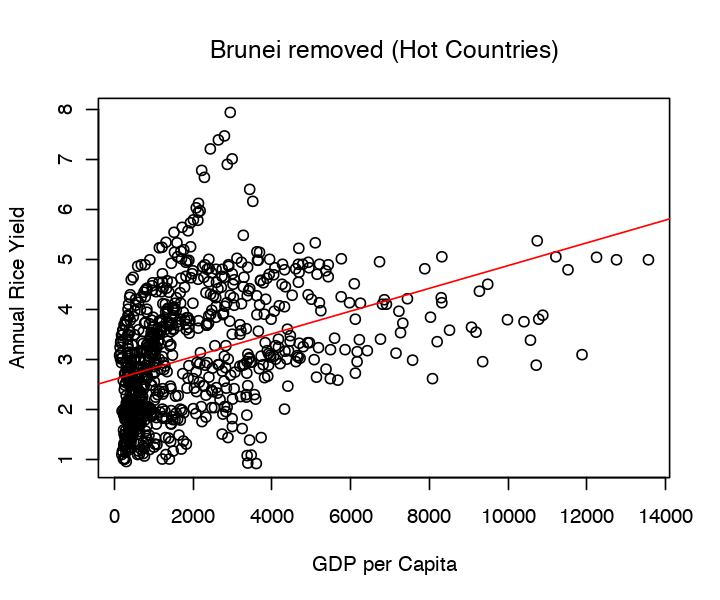

In [476]:
df_cluster3_no_outliers = df_cluster3[!(df_cluster3$COUNTRY %in% c('Brunei','Trinidad and Tobago')),]
model = lm(YIELD ~ GDP.PER.CAPITA, data = df_cluster3_no_outliers)

plot(df_cluster3_no_outliers$GDP.PER.CAPITA,df_cluster3_no_outliers$YIELD,xlab="GDP per Capita",ylab="Annual Rice Yield",main="Brunei removed (Hot Countries)")
abline(model,col='red')


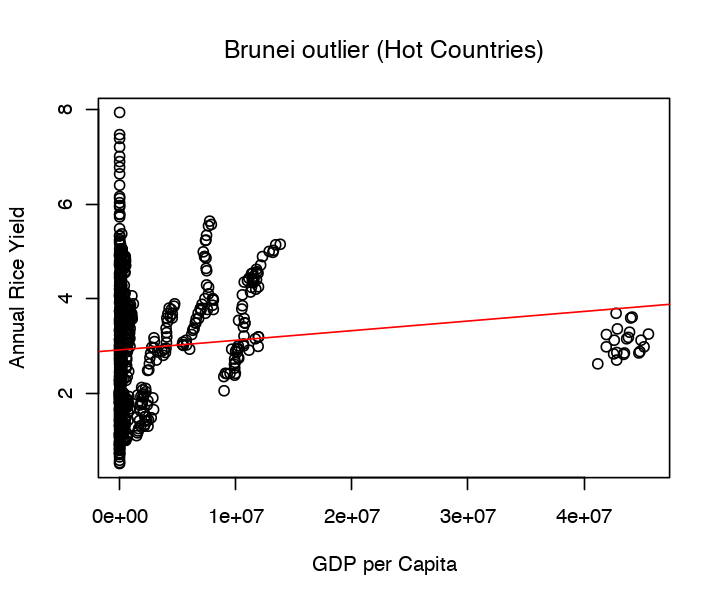

In [521]:
#model = lm(YIELD ~ YEAR + GDP.PER.CAPITA + AVG_Q1_TEMP + AVG_Q2_RF, data = df_cluster3)
model = lm(YIELD ~ HARV_AREA, data = df_cluster3)

plot(df_cluster3$HARV_AREA,df_cluster3$YIELD,xlab="GDP per Capita",ylab="Annual Rice Yield",main="Brunei outlier (Hot Countries)")
abline(model,col='red')

In [522]:
head(df_cluster3[order(df_cluster3$HARV_AREA,decreasing=T),c('COUNTRY','HARV_AREA','YIELD')])

,COUNTRY,HARV_AREA,YIELD
1118,India,45537400,3.25
1109,India,45160000,2.98
1111,India,44900000,3.12
1108,India,44802300,2.88
1110,India,44712000,2.85
1123,India,44135950,3.61


In [62]:
# Just Weather data + YEAR
#FitAll = lm(YIELD ~ YEAR + factor(COUNTRY) + AVG_TEMP_JAN+AVG_TEMP_JUL+AVG_RF_JAN+AVG_RF_APR+AVG_RF_JUL+AVG_RF_OCT, data=df_detrended)

# COUNTRY + YEAR + WEATHER
#FitAll = lm(YIELD ~ AVG_TEMP_JAN+AVG_TEMP_JUL+AVG_RF_JAN+AVG_RF_APR+AVG_RF_JUL+AVG_RF_OCT, data=df_detrended)

#FitAll = lm(YIELD ~ YEAR+factor(COUNTRY)+HARV_AREA+FERT+AVG_TEMP_JAN+AVG_TEMP_JUL+AVG_RF_JAN+AVG_RF_APR+AVG_RF_JUL+AVG_RF_OCT, data=df_detrended)

#step(FitAll,direction='backward')


In [52]:
model = lm(YIELD ~ YEAR+HARV_AREA+FERT+GDP.PER.CAPITA+AVG_Q1_TEMP+AVG_Q3_TEMP+AVG_Q1_RF+AVG_Q2_RF+AVG_Q3_RF+AVG_Q4_RF, data = df_cluster2)
summary(model)



Call:
lm(formula = YIELD ~ YEAR + HARV_AREA + FERT + GDP.PER.CAPITA + 
    AVG_Q1_TEMP + AVG_Q3_TEMP + AVG_Q1_RF + AVG_Q2_RF + AVG_Q3_RF + 
    AVG_Q4_RF, data = df_cluster2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8483 -0.9879 -0.2606  0.8584  3.8534 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -2.717e+01  1.754e+01  -1.549   0.1217    
YEAR            1.657e-02  8.778e-03   1.887   0.0595 .  
HARV_AREA      -2.593e-10  7.982e-08  -0.003   0.9974    
FERT            1.034e-02  5.725e-04  18.062   <2e-16 ***
GDP.PER.CAPITA  1.190e-04  8.319e-06  14.303   <2e-16 ***
AVG_Q1_TEMP    -3.889e-02  1.581e-02  -2.460   0.0141 *  
AVG_Q3_TEMP    -9.707e-02  1.154e-02  -8.409   <2e-16 ***
AVG_Q1_RF      -6.162e-03  7.277e-04  -8.468   <2e-16 ***
AVG_Q2_RF       1.959e-03  1.343e-03   1.459   0.1451    
AVG_Q3_RF      -7.410e-04  1.426e-03  -0.520   0.6036    
AVG_Q4_RF       3.702e-04  1.146e-03   0.323   0.7467    
---
Signif. codes: 

# All countries

In [31]:
FitAll = lm(YIELD ~ AVG_TEMP_JAN+AVG_TEMP_FEB+AVG_TEMP_MAR+AVG_TEMP_APR+AVG_TEMP_MAY+AVG_TEMP_JUN+AVG_TEMP_JUL+AVG_TEMP_AUG+AVG_TEMP_SEP+AVG_TEMP_OCT+AVG_TEMP_NOV+AVG_TEMP_DEC+AVG_RF_JAN+AVG_RF_FEB+AVG_RF_MAR+AVG_RF_APR+AVG_RF_MAY+AVG_RF_JUN+AVG_RF_JUL+AVG_RF_AUG+AVG_RF_SEP+AVG_RF_OCT+AVG_RF_NOV+AVG_RF_DEC, data=df_detrended)
step(FitAll,direction='backward')


Start:  AIC=2108.36
YIELD ~ AVG_TEMP_JAN + AVG_TEMP_FEB + AVG_TEMP_MAR + AVG_TEMP_APR + 
    AVG_TEMP_MAY + AVG_TEMP_JUN + AVG_TEMP_JUL + AVG_TEMP_AUG + 
    AVG_TEMP_SEP + AVG_TEMP_OCT + AVG_TEMP_NOV + AVG_TEMP_DEC + 
    AVG_RF_JAN + AVG_RF_FEB + AVG_RF_MAR + AVG_RF_APR + AVG_RF_MAY + 
    AVG_RF_JUN + AVG_RF_JUL + AVG_RF_AUG + AVG_RF_SEP + AVG_RF_OCT + 
    AVG_RF_NOV + AVG_RF_DEC

               Df Sum of Sq    RSS    AIC
- AVG_RF_OCT    1     0.045 5604.9 2106.4
- AVG_TEMP_DEC  1     0.118 5605.0 2106.4
- AVG_RF_NOV    1     0.347 5605.2 2106.5
- AVG_RF_DEC    1     0.678 5605.5 2106.6
- AVG_RF_AUG    1     1.892 5606.7 2107.1
- AVG_TEMP_NOV  1     2.202 5607.0 2107.2
- AVG_TEMP_SEP  1     3.329 5608.2 2107.7
- AVG_RF_MAY    1     3.511 5608.3 2107.7
- AVG_TEMP_OCT  1     3.795 5608.6 2107.8
- AVG_TEMP_FEB  1     4.382 5609.2 2108.1
- AVG_TEMP_MAR  1     5.046 5609.9 2108.3
<none>                      5604.8 2108.4
- AVG_RF_FEB    1     7.165 5612.0 2109.2
- AVG_RF_APR    1     9.


Call:
lm(formula = YIELD ~ AVG_TEMP_JAN + AVG_TEMP_APR + AVG_TEMP_MAY + 
    AVG_TEMP_JUN + AVG_TEMP_JUL + AVG_TEMP_AUG + AVG_RF_JAN + 
    AVG_RF_FEB + AVG_RF_MAR + AVG_RF_APR + AVG_RF_JUN + AVG_RF_JUL + 
    AVG_RF_SEP, data = df_detrended)

Coefficients:
 (Intercept)  AVG_TEMP_JAN  AVG_TEMP_APR  AVG_TEMP_MAY  AVG_TEMP_JUN  
    5.038230      0.130293     -0.213793     -0.148272     -0.140973  
AVG_TEMP_JUL  AVG_TEMP_AUG    AVG_RF_JAN    AVG_RF_FEB    AVG_RF_MAR  
    0.129257      0.201245     -0.002069      0.001167     -0.002388  
  AVG_RF_APR    AVG_RF_JUN    AVG_RF_JUL    AVG_RF_SEP  
   -0.001135      0.001504      0.001114     -0.001519  


In [95]:
model = lm(formula = YIELD_Z ~ AVG_TEMP_APR_Z + AVG_TEMP_MAY_Z + AVG_TEMP_NOV_Z + 
    AVG_RF_MAR_Z + AVG_RF_APR_Z + AVG_RF_NOV_Z + AVG_RF_DEC_Z, data = df_detrended)
summary(model)


Call:
lm(formula = YIELD_Z ~ AVG_TEMP_APR_Z + AVG_TEMP_MAY_Z + AVG_TEMP_NOV_Z + 
    AVG_RF_MAR_Z + AVG_RF_APR_Z + AVG_RF_NOV_Z + AVG_RF_DEC_Z, 
    data = df_detrended)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1330 -0.5591  0.0451  0.5773  3.5443 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)   
(Intercept)     1.350e-17  2.079e-02   0.000  1.00000   
AVG_TEMP_APR_Z  6.421e-02  2.431e-02   2.641  0.00832 **
AVG_TEMP_MAY_Z -5.577e-02  2.381e-02  -2.342  0.01925 * 
AVG_TEMP_NOV_Z -4.842e-02  2.181e-02  -2.220  0.02649 * 
AVG_RF_MAR_Z    3.340e-02  2.176e-02   1.535  0.12489   
AVG_RF_APR_Z    4.865e-02  2.207e-02   2.204  0.02762 * 
AVG_RF_NOV_Z   -5.705e-02  2.166e-02  -2.634  0.00851 **
AVG_RF_DEC_Z    3.372e-02  2.162e-02   1.560  0.11901   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9714 on 2176 degrees of freedom
Multiple R-squared:  0.0129,	Adjusted R-squared:  0.009724 
F-statistic: 4.062 o

In [97]:
model = lm(formula = YIELD_Z ~ AVG_TEMP_APR_Z + AVG_TEMP_MAY_Z + AVG_TEMP_NOV_Z + 
    + AVG_RF_APR_Z + AVG_RF_NOV_Z, data = df_detrended)
summary(model)


Call:
lm(formula = YIELD_Z ~ AVG_TEMP_APR_Z + AVG_TEMP_MAY_Z + AVG_TEMP_NOV_Z + 
    +AVG_RF_APR_Z + AVG_RF_NOV_Z, data = df_detrended)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1185 -0.5597  0.0483  0.5712  3.5514 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)     1.455e-17  2.080e-02   0.000   1.0000  
AVG_TEMP_APR_Z  6.037e-02  2.415e-02   2.500   0.0125 *
AVG_TEMP_MAY_Z -5.745e-02  2.376e-02  -2.418   0.0157 *
AVG_TEMP_NOV_Z -4.813e-02  2.171e-02  -2.217   0.0267 *
AVG_RF_APR_Z    5.052e-02  2.203e-02   2.293   0.0220 *
AVG_RF_NOV_Z   -5.380e-02  2.146e-02  -2.507   0.0123 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.972 on 2178 degrees of freedom
Multiple R-squared:  0.01076,	Adjusted R-squared:  0.008489 
F-statistic: 4.738 on 5 and 2178 DF,  p-value: 0.0002617


# Cluster 1: Very cold winters with constant low rainfall 

In [148]:
# Create data set for each cluster
df_cluster1 = subset(df_detrended,cluster_id==1)
df_cluster2 = subset(df_detrended,cluster_id==2)
df_cluster3 = subset(df_detrended,cluster_id==3)

In [99]:
cluster_centres

,AVG_TEMP_JAN,AVG_TEMP_FEB,AVG_TEMP_MAR,AVG_TEMP_APR,AVG_TEMP_MAY,AVG_TEMP_JUN,AVG_TEMP_JUL,AVG_TEMP_AUG,AVG_TEMP_SEP,AVG_TEMP_OCT,⋯,AVG_RF_MAR,AVG_RF_APR,AVG_RF_MAY,AVG_RF_JUN,AVG_RF_JUL,AVG_RF_AUG,AVG_RF_SEP,AVG_RF_OCT,AVG_RF_NOV,AVG_RF_DEC
1,-0.9139926,0.5358739,5.024352,10.34044,15.06090,19.14154,21.35687,20.93695,16.77355,11.37797,⋯,47.08572,55.26622,65.30166,73.90451,81.90675,71.98635,62.22901,52.70039,47.36561,46.13487
2,22.0704502,22.7675632,23.530497,23.85335,23.66198,23.05258,22.60924,23.11586,23.78542,23.88947,⋯,116.27366,92.40203,67.47556,45.38880,47.17030,49.98709,52.97540,70.15781,85.45955,102.15956
3,24.0359879,25.1488650,26.427381,27.23361,27.16674,26.63539,26.08088,25.93994,26.02402,25.98844,⋯,80.58824,115.69618,193.18361,218.55141,238.54135,257.61324,234.19366,203.93025,133.10986,98.25473


In [102]:
FitAll = lm(YIELD_Z ~ AVG_TEMP_JAN_Z+AVG_TEMP_FEB_Z+AVG_TEMP_MAR_Z+AVG_TEMP_APR_Z+AVG_TEMP_MAY_Z+AVG_TEMP_JUN_Z+AVG_TEMP_JUL_Z+AVG_TEMP_AUG_Z+AVG_TEMP_SEP_Z+AVG_TEMP_OCT_Z+AVG_TEMP_NOV_Z+AVG_TEMP_DEC_Z+AVG_RF_JAN_Z+AVG_RF_FEB_Z+AVG_RF_MAR_Z+AVG_RF_APR_Z+AVG_RF_MAY_Z+AVG_RF_JUN_Z+AVG_RF_JUL_Z+AVG_RF_AUG_Z+AVG_RF_SEP_Z+AVG_RF_OCT_Z+AVG_RF_NOV_Z+AVG_RF_DEC_Z, data=df_cluster1)
step(FitAll,direction='backward')


Start:  AIC=-1
YIELD_Z ~ AVG_TEMP_JAN_Z + AVG_TEMP_FEB_Z + AVG_TEMP_MAR_Z + 
    AVG_TEMP_APR_Z + AVG_TEMP_MAY_Z + AVG_TEMP_JUN_Z + AVG_TEMP_JUL_Z + 
    AVG_TEMP_AUG_Z + AVG_TEMP_SEP_Z + AVG_TEMP_OCT_Z + AVG_TEMP_NOV_Z + 
    AVG_TEMP_DEC_Z + AVG_RF_JAN_Z + AVG_RF_FEB_Z + AVG_RF_MAR_Z + 
    AVG_RF_APR_Z + AVG_RF_MAY_Z + AVG_RF_JUN_Z + AVG_RF_JUL_Z + 
    AVG_RF_AUG_Z + AVG_RF_SEP_Z + AVG_RF_OCT_Z + AVG_RF_NOV_Z + 
    AVG_RF_DEC_Z

                 Df Sum of Sq    RSS      AIC
- AVG_RF_JUN_Z    1    0.0026 518.23 -2.99758
- AVG_RF_NOV_Z    1    0.0082 518.23 -2.99148
- AVG_TEMP_APR_Z  1    0.0125 518.24 -2.98676
- AVG_TEMP_JAN_Z  1    0.0164 518.24 -2.98244
- AVG_TEMP_SEP_Z  1    0.0169 518.24 -2.98196
- AVG_TEMP_AUG_Z  1    0.0344 518.26 -2.96272
- AVG_TEMP_OCT_Z  1    0.0797 518.31 -2.91324
- AVG_RF_FEB_Z    1    0.0956 518.32 -2.89584
- AVG_TEMP_MAR_Z  1    0.2186 518.44 -2.76125
- AVG_TEMP_FEB_Z  1    0.2362 518.46 -2.74203
- AVG_RF_SEP_Z    1    0.2823 518.51 -2.69161
- AVG_RF_J


Call:
lm(formula = YIELD_Z ~ AVG_TEMP_JUL_Z + AVG_TEMP_NOV_Z + AVG_RF_JAN_Z + 
    AVG_RF_APR_Z + AVG_RF_AUG_Z, data = df_cluster1)

Coefficients:
   (Intercept)  AVG_TEMP_JUL_Z  AVG_TEMP_NOV_Z    AVG_RF_JAN_Z    AVG_RF_APR_Z  
     3.180e-17       1.007e-01      -7.209e-02       6.426e-02       7.871e-02  
  AVG_RF_AUG_Z  
    -7.007e-02  


In [103]:
model = lm(YIELD_Z ~ AVG_TEMP_JUL_Z + AVG_TEMP_NOV_Z + AVG_RF_JAN_Z + AVG_RF_APR_Z + AVG_RF_AUG_Z, data=df_cluster1)
summary(model)



Call:
lm(formula = YIELD_Z ~ AVG_TEMP_JUL_Z + AVG_TEMP_NOV_Z + AVG_RF_JAN_Z + 
    AVG_RF_APR_Z + AVG_RF_AUG_Z, data = df_cluster1)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4960 -0.5887  0.0058  0.6693  3.4572 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)     3.180e-17  4.061e-02   0.000   1.0000  
AVG_TEMP_JUL_Z  1.007e-01  4.175e-02   2.412   0.0162 *
AVG_TEMP_NOV_Z -7.209e-02  4.181e-02  -1.724   0.0852 .
AVG_RF_JAN_Z    6.426e-02  4.174e-02   1.539   0.1243  
AVG_RF_APR_Z    7.871e-02  4.197e-02   1.876   0.0612 .
AVG_RF_AUG_Z   -7.007e-02  4.169e-02  -1.681   0.0934 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9669 on 561 degrees of freedom
Multiple R-squared:  0.02871,	Adjusted R-squared:  0.02005 
F-statistic: 3.316 on 5 and 561 DF,  p-value: 0.005825


In [107]:
model = lm(YIELD_Z ~ AVG_TEMP_JUL_Z, data=df_cluster1)
summary(model)


Call:
lm(formula = YIELD_Z ~ AVG_TEMP_JUL_Z, data = df_cluster1)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5714 -0.6196  0.0063  0.6633  3.5443 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)  
(Intercept)    3.525e-17  4.088e-02   0.000   1.0000  
AVG_TEMP_JUL_Z 9.337e-02  4.189e-02   2.229   0.0262 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9734 on 565 degrees of freedom
Multiple R-squared:  0.008719,	Adjusted R-squared:  0.006964 
F-statistic: 4.969 on 1 and 565 DF,  p-value: 0.02619


# Cluster 2: Warm all year round with good winter rainfall

In [108]:
cluster_centres

,AVG_TEMP_JAN,AVG_TEMP_FEB,AVG_TEMP_MAR,AVG_TEMP_APR,AVG_TEMP_MAY,AVG_TEMP_JUN,AVG_TEMP_JUL,AVG_TEMP_AUG,AVG_TEMP_SEP,AVG_TEMP_OCT,⋯,AVG_RF_MAR,AVG_RF_APR,AVG_RF_MAY,AVG_RF_JUN,AVG_RF_JUL,AVG_RF_AUG,AVG_RF_SEP,AVG_RF_OCT,AVG_RF_NOV,AVG_RF_DEC
1,-0.9139926,0.5358739,5.024352,10.34044,15.06090,19.14154,21.35687,20.93695,16.77355,11.37797,⋯,47.08572,55.26622,65.30166,73.90451,81.90675,71.98635,62.22901,52.70039,47.36561,46.13487
2,22.0704502,22.7675632,23.530497,23.85335,23.66198,23.05258,22.60924,23.11586,23.78542,23.88947,⋯,116.27366,92.40203,67.47556,45.38880,47.17030,49.98709,52.97540,70.15781,85.45955,102.15956
3,24.0359879,25.1488650,26.427381,27.23361,27.16674,26.63539,26.08088,25.93994,26.02402,25.98844,⋯,80.58824,115.69618,193.18361,218.55141,238.54135,257.61324,234.19366,203.93025,133.10986,98.25473


In [109]:
FitAll = lm(YIELD_Z ~ AVG_TEMP_JAN_Z+AVG_TEMP_FEB_Z+AVG_TEMP_MAR_Z+AVG_TEMP_APR_Z+AVG_TEMP_MAY_Z+AVG_TEMP_JUN_Z+AVG_TEMP_JUL_Z+AVG_TEMP_AUG_Z+AVG_TEMP_SEP_Z+AVG_TEMP_OCT_Z+AVG_TEMP_NOV_Z+AVG_TEMP_DEC_Z+AVG_RF_JAN_Z+AVG_RF_FEB_Z+AVG_RF_MAR_Z+AVG_RF_APR_Z+AVG_RF_MAY_Z+AVG_RF_JUN_Z+AVG_RF_JUL_Z+AVG_RF_AUG_Z+AVG_RF_SEP_Z+AVG_RF_OCT_Z+AVG_RF_NOV_Z+AVG_RF_DEC_Z, data=df_cluster2)
step(FitAll,direction='backward')


Start:  AIC=-29.48
YIELD_Z ~ AVG_TEMP_JAN_Z + AVG_TEMP_FEB_Z + AVG_TEMP_MAR_Z + 
    AVG_TEMP_APR_Z + AVG_TEMP_MAY_Z + AVG_TEMP_JUN_Z + AVG_TEMP_JUL_Z + 
    AVG_TEMP_AUG_Z + AVG_TEMP_SEP_Z + AVG_TEMP_OCT_Z + AVG_TEMP_NOV_Z + 
    AVG_TEMP_DEC_Z + AVG_RF_JAN_Z + AVG_RF_FEB_Z + AVG_RF_MAR_Z + 
    AVG_RF_APR_Z + AVG_RF_MAY_Z + AVG_RF_JUN_Z + AVG_RF_JUL_Z + 
    AVG_RF_AUG_Z + AVG_RF_SEP_Z + AVG_RF_OCT_Z + AVG_RF_NOV_Z + 
    AVG_RF_DEC_Z

                 Df Sum of Sq    RSS     AIC
- AVG_TEMP_MAY_Z  1    0.0025 680.56 -31.474
- AVG_TEMP_FEB_Z  1    0.0063 680.56 -31.470
- AVG_TEMP_JUN_Z  1    0.0079 680.57 -31.468
- AVG_RF_JAN_Z    1    0.0338 680.59 -31.439
- AVG_RF_SEP_Z    1    0.1194 680.68 -31.344
- AVG_TEMP_OCT_Z  1    0.1350 680.69 -31.327
- AVG_RF_AUG_Z    1    0.2666 680.82 -31.181
- AVG_TEMP_JAN_Z  1    0.3064 680.86 -31.137
- AVG_RF_FEB_Z    1    0.3484 680.91 -31.090
- AVG_TEMP_DEC_Z  1    0.4612 681.02 -30.965
- AVG_TEMP_NOV_Z  1    0.7476 681.31 -30.647
- AVG_TEMP_AUG_Z  


Call:
lm(formula = YIELD_Z ~ AVG_TEMP_MAR_Z + AVG_TEMP_APR_Z + AVG_TEMP_AUG_Z + 
    AVG_TEMP_SEP_Z + AVG_RF_MAR_Z + AVG_RF_APR_Z + AVG_RF_MAY_Z + 
    AVG_RF_NOV_Z + AVG_RF_DEC_Z, data = df_cluster2)

Coefficients:
   (Intercept)  AVG_TEMP_MAR_Z  AVG_TEMP_APR_Z  AVG_TEMP_AUG_Z  AVG_TEMP_SEP_Z  
     2.754e-17      -5.804e-02       8.863e-02      -6.555e-02       7.196e-02  
  AVG_RF_MAR_Z    AVG_RF_APR_Z    AVG_RF_MAY_Z    AVG_RF_NOV_Z    AVG_RF_DEC_Z  
     9.271e-02       6.286e-02      -8.682e-02      -1.082e-01       1.107e-01  


In [110]:
model = lm(YIELD_Z ~ AVG_TEMP_MAR_Z + AVG_TEMP_APR_Z + AVG_TEMP_AUG_Z + AVG_TEMP_SEP_Z + AVG_RF_MAR_Z + AVG_RF_APR_Z + AVG_RF_MAY_Z + AVG_RF_NOV_Z + AVG_RF_DEC_Z, data=df_cluster2)
summary(model)



Call:
lm(formula = YIELD_Z ~ AVG_TEMP_MAR_Z + AVG_TEMP_APR_Z + AVG_TEMP_AUG_Z + 
    AVG_TEMP_SEP_Z + AVG_RF_MAR_Z + AVG_RF_APR_Z + AVG_RF_MAY_Z + 
    AVG_RF_NOV_Z + AVG_RF_DEC_Z, data = df_cluster2)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1945 -0.4511  0.0778  0.5300  3.4617 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)   
(Intercept)     2.754e-17  3.493e-02   0.000  1.00000   
AVG_TEMP_MAR_Z -5.804e-02  3.975e-02  -1.460  0.14467   
AVG_TEMP_APR_Z  8.863e-02  4.064e-02   2.181  0.02950 * 
AVG_TEMP_AUG_Z -6.555e-02  3.788e-02  -1.731  0.08395 . 
AVG_TEMP_SEP_Z  7.196e-02  3.785e-02   1.901  0.05770 . 
AVG_RF_MAR_Z    9.271e-02  3.703e-02   2.504  0.01251 * 
AVG_RF_APR_Z    6.286e-02  3.671e-02   1.712  0.08723 . 
AVG_RF_MAY_Z   -8.682e-02  3.622e-02  -2.397  0.01676 * 
AVG_RF_NOV_Z   -1.082e-01  3.731e-02  -2.901  0.00383 **
AVG_RF_DEC_Z    1.107e-01  3.708e-02   2.985  0.00292 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘

In [121]:
model = lm(YIELD_Z ~ AVG_RF_MAR_Z + AVG_RF_MAY_Z + AVG_RF_NOV_Z + AVG_RF_DEC_Z, data=df_cluster2)
summary(model)



Call:
lm(formula = YIELD_Z ~ AVG_RF_MAR_Z + AVG_RF_MAY_Z + AVG_RF_NOV_Z + 
    AVG_RF_DEC_Z, data = df_cluster2)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3657 -0.4863  0.0945  0.5423  3.2951 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)   3.216e-17  3.510e-02   0.000  1.00000   
AVG_RF_MAR_Z  8.840e-02  3.604e-02   2.453  0.01440 * 
AVG_RF_MAY_Z -8.201e-02  3.614e-02  -2.269  0.02354 * 
AVG_RF_NOV_Z -9.922e-02  3.700e-02  -2.682  0.00749 **
AVG_RF_DEC_Z  1.073e-01  3.703e-02   2.897  0.00387 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9651 on 751 degrees of freedom
Multiple R-squared:  0.02842,	Adjusted R-squared:  0.02324 
F-statistic: 5.492 on 4 and 751 DF,  p-value: 0.0002321


# Cluster 3: Hot all year round and with very heavy summer rainfall

In [122]:
FitAll = lm(YIELD_Z ~ AVG_TEMP_JAN_Z+AVG_TEMP_FEB_Z+AVG_TEMP_MAR_Z+AVG_TEMP_APR_Z+AVG_TEMP_MAY_Z+AVG_TEMP_JUN_Z+AVG_TEMP_JUL_Z+AVG_TEMP_AUG_Z+AVG_TEMP_SEP_Z+AVG_TEMP_OCT_Z+AVG_TEMP_NOV_Z+AVG_TEMP_DEC_Z+AVG_RF_JAN_Z+AVG_RF_FEB_Z+AVG_RF_MAR_Z+AVG_RF_APR_Z+AVG_RF_MAY_Z+AVG_RF_JUN_Z+AVG_RF_JUL_Z+AVG_RF_AUG_Z+AVG_RF_SEP_Z+AVG_RF_OCT_Z+AVG_RF_NOV_Z+AVG_RF_DEC_Z, data=df_cluster3)
step(FitAll,direction='backward')


Start:  AIC=-23.62
YIELD_Z ~ AVG_TEMP_JAN_Z + AVG_TEMP_FEB_Z + AVG_TEMP_MAR_Z + 
    AVG_TEMP_APR_Z + AVG_TEMP_MAY_Z + AVG_TEMP_JUN_Z + AVG_TEMP_JUL_Z + 
    AVG_TEMP_AUG_Z + AVG_TEMP_SEP_Z + AVG_TEMP_OCT_Z + AVG_TEMP_NOV_Z + 
    AVG_TEMP_DEC_Z + AVG_RF_JAN_Z + AVG_RF_FEB_Z + AVG_RF_MAR_Z + 
    AVG_RF_APR_Z + AVG_RF_MAY_Z + AVG_RF_JUN_Z + AVG_RF_JUL_Z + 
    AVG_RF_AUG_Z + AVG_RF_SEP_Z + AVG_RF_OCT_Z + AVG_RF_NOV_Z + 
    AVG_RF_DEC_Z

                 Df Sum of Sq    RSS     AIC
- AVG_RF_FEB_Z    1    0.0000 790.44 -25.616
- AVG_TEMP_FEB_Z  1    0.0048 790.45 -25.611
- AVG_RF_SEP_Z    1    0.0071 790.45 -25.608
- AVG_TEMP_JAN_Z  1    0.0118 790.45 -25.603
- AVG_RF_AUG_Z    1    0.0119 790.45 -25.603
- AVG_RF_DEC_Z    1    0.0135 790.46 -25.602
- AVG_RF_JUN_Z    1    0.0403 790.48 -25.572
- AVG_RF_MAR_Z    1    0.0504 790.49 -25.561
- AVG_RF_JAN_Z    1    0.1997 790.64 -25.399
- AVG_RF_NOV_Z    1    0.2508 790.69 -25.343
- AVG_TEMP_DEC_Z  1    0.5508 790.99 -25.017
- AVG_RF_OCT_Z    


Call:
lm(formula = YIELD_Z ~ AVG_TEMP_MAR_Z + AVG_TEMP_APR_Z + AVG_TEMP_MAY_Z + 
    AVG_TEMP_JUN_Z + AVG_TEMP_OCT_Z + AVG_RF_MAY_Z, data = df_cluster3)

Coefficients:
   (Intercept)  AVG_TEMP_MAR_Z  AVG_TEMP_APR_Z  AVG_TEMP_MAY_Z  AVG_TEMP_JUN_Z  
     2.706e-17      -6.599e-02       1.359e-01      -7.310e-02      -5.825e-02  
AVG_TEMP_OCT_Z    AVG_RF_MAY_Z  
    -7.340e-02       5.998e-02  


In [132]:
model = lm(YIELD_Z ~ AVG_TEMP_APR_Z + AVG_TEMP_MAY_Z, data=df_cluster3)
summary(model)



Call:
lm(formula = YIELD_Z ~ AVG_TEMP_APR_Z + AVG_TEMP_MAY_Z, data = df_cluster3)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0757 -0.5807  0.0041  0.5560  3.3866 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     2.866e-17  3.307e-02   0.000 1.000000    
AVG_TEMP_APR_Z  1.047e-01  4.130e-02   2.534 0.011457 *  
AVG_TEMP_MAY_Z -1.462e-01  4.130e-02  -3.540 0.000422 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9703 on 858 degrees of freedom
Multiple R-squared:  0.01483,	Adjusted R-squared:  0.01253 
F-statistic: 6.458 on 2 and 858 DF,  p-value: 0.001645


# Classification of Rice Yield

In this section we shall investigate if the weather for the year can be used to infer whether the rice yield is above or below trend. We will first establish a benchmark model and then build a random forest model. 

In [187]:
# Let us begin by removing rows with NULL columns (We lose 4 rows for every country!)
df_detrended = df_detrended[complete.cases(df_detrended),]

In [267]:
# Now we need to create a target column with values "Above" and "Below" 
# (as in the yield for that year was above expectations or below expectations)

df_detrended$target = sign(df_detrended$YIELD_Z)
df_detrended[df_detrended$target==1 | df_detrended$target==0,'target'] = 'Above'
df_detrended[df_detrended$target==-1,'target'] = 'Below'

# Make target variable a factor
df_detrended$target = factor(df_detrended$target)

# Create data set for each cluster
df_cluster1 = subset(df_detrended,cluster_id==1)
df_cluster2 = subset(df_detrended,cluster_id==2)
df_cluster3 = subset(df_detrended,cluster_id==3)


In [268]:
# Benchmark Model
table(df_detrended$target)


Above Below 
 1152  1032 

# Random Forest Model on ALL countries

We shall train a random forest model on all our 94 countries. We first to extract the subset of data that we need to train our model and then split this data set into training and test sets

In [283]:
# Model features
target_variable = 'target'
attribute_variables = c()
#attribute_variables = c('COUNTRY','YEAR')
attribute_variables = c('COUNTRY','YEAR','LAND_AREA','HARV_AREA','FERT')

#weather_features = c('AVG_TEMP_JAN_Z','AVG_TEMP_FEB_Z','AVG_TEMP_MAR_Z','AVG_TEMP_APR_Z','AVG_TEMP_MAY_Z','AVG_TEMP_JUN_Z',
#                     'AVG_TEMP_JUL_Z','AVG_TEMP_AUG_Z','AVG_TEMP_SEP_Z','AVG_TEMP_OCT_Z','AVG_TEMP_NOV_Z','AVG_TEMP_DEC_Z',
#                     'AVG_RF_JAN_Z','AVG_RF_FEB_Z','AVG_RF_MAR_Z','AVG_RF_APR_Z','AVG_RF_MAY_Z','AVG_RF_JUN_Z',
#                     'AVG_RF_JUL_Z','AVG_RF_AUG_Z','AVG_RF_SEP_Z','AVG_RF_OCT_Z','AVG_RF_NOV_Z','AVG_RF_DEC_Z')

weather_features = c('AVG_TEMP_JAN','AVG_TEMP_FEB','AVG_TEMP_MAR','AVG_TEMP_APR','AVG_TEMP_MAY','AVG_TEMP_JUN',
                     'AVG_TEMP_JUL','AVG_TEMP_AUG','AVG_TEMP_SEP','AVG_TEMP_OCT','AVG_TEMP_NOV','AVG_TEMP_DEC',
                     'AVG_RF_JAN','AVG_RF_FEB','AVG_RF_MAR','AVG_RF_APR','AVG_RF_MAY','AVG_RF_JUN',
                     'AVG_RF_JUL','AVG_RF_AUG','AVG_RF_SEP','AVG_RF_OCT','AVG_RF_NOV','AVG_RF_DEC')


# Create dataframe with variables required for model
#df_model_data = df_detrended[,c(target_variable, attribute_variables, weather_features)]
df_model_data = df_cluster1[,c(target_variable, attribute_variables, weather_features)]

In [232]:
library(caTools)
library(caret)
library(randomForest)

In [284]:
# Split data
set.seed(123)
split = sample.split(df_model_data$target,SplitRatio=0.7)
Train = subset(df_model_data,split==T)
Test = subset(df_model_data,split==F)

Train = df_model_data

In [218]:
# Random Search
#control <- trainControl(method="repeatedcv", number=10, repeats=3, search="random")
#control <- trainControl(method="cv", number=10, search="random")
#seed=23
#set.seed(seed)
#metric <- "Accuracy"
#mtry <- sqrt(ncol(Train)-3)
#rf_random <- train(target~. - YEAR - COUNTRY, data=Train, method="rf", metric=metric, tuneLength=15, trControl=control)
#print(rf_random)



In [288]:
#Create control function for training with 10 folds 
#control <- trainControl(method='cv',number=10,search='grid')
control <- trainControl(method="repeatedcv", number=10, repeats=3, search="grid")

#create tunegrid. Our train function will change number of entry variable at each split according to tunegrid. 
tunegrid <- expand.grid(.mtry = (1:24)) 

#rf_gridsearch <- train(target~. - YEAR - COUNTRY, data=Train, method="rf", ntree=10, metric = 'Accuracy', tuneGrid = tunegrid, trControl=control)
rf_gridsearch <- train(target~. , data=Train, method="rf", ntree=200, metric = 'Accuracy', tuneGrid = tunegrid, trControl=control)

print(rf_gridsearch)


Random Forest 

567 samples
 29 predictor
  2 classes: 'Above', 'Below' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 510, 510, 511, 511, 511, 510, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa       
   1    0.5220245   0.000000000
   2    0.5232146   0.002935724
   3    0.5261393   0.011331095
   4    0.5196958   0.003449563
   5    0.5173465   0.003618133
   6    0.5179634   0.008921386
   7    0.5107485  -0.001118080
   8    0.5149868   0.012971482
   9    0.5024983  -0.010267132
  10    0.4919695  -0.027366004
  11    0.5037302  -0.004569417
  12    0.4990000  -0.011460389
  13    0.5013691  -0.007330353
  14    0.5054943   0.001773334
  15    0.4954163  -0.019022268
  16    0.4889742  -0.032014129
  17    0.4978787  -0.013427229
  18    0.5072383   0.005222504
  19    0.5025498  -0.003670042
  20    0.5032286  -0.003058092
  21    0.4908111  -0.028188307
  22    0.4972035  -0.013978892
  23    0

In [279]:
table(Train$target)


Above Below 
  296   271 

In [278]:
296/(296+271)

[1] 0.5220459

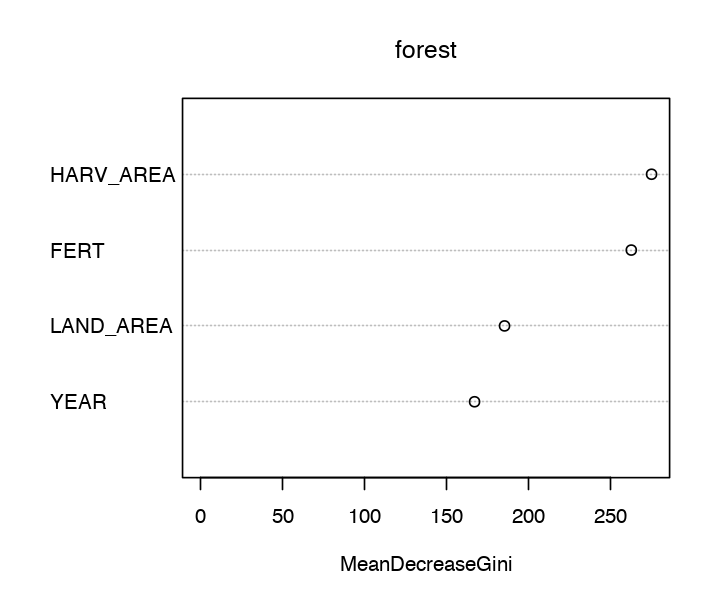

In [266]:
forest <- randomForest(target ~ . , data=Train, ntree=200, mtry=1)

varImpPlot(forest)

In [1000]:
#rf <- predict(forest, type = "class")
#confusionMatrix(rf, Train$target, positive = "Above")

rf <- predict(forest, newdata=Test, type = "class")
confusionMatrix(rf, Test$target, positive = "Above")

Confusion Matrix and Statistics

          Reference
Prediction Above Below
     Above   179   180
     Below   127   107
                                          
               Accuracy : 0.4823          
                 95% CI : (0.4414, 0.5234)
    No Information Rate : 0.516           
    P-Value [Acc > NIR] : 0.953925        
                                          
                  Kappa : -0.0425         
 Mcnemar's Test P-Value : 0.002999        
                                          
            Sensitivity : 0.5850          
            Specificity : 0.3728          
         Pos Pred Value : 0.4986          
         Neg Pred Value : 0.4573          
             Prevalence : 0.5160          
         Detection Rate : 0.3019          
   Detection Prevalence : 0.6054          
      Balanced Accuracy : 0.4789          
                                          
       'Positive' Class : Above           
                                          

In [884]:
table(Test$target)


Above Below 
  306   287 

In [885]:
306/(306+287)

[1] 0.5160202

# Cluster Analysis

In [225]:
# Create data set for each cluster
df_cluster1 = subset(df_detrended,cluster_id==1)
df_cluster2 = subset(df_detrended,cluster_id==2)
df_cluster3 = subset(df_detrended,cluster_id==3)


# Random Forest Model on Clusters

In [239]:
cluster_centres

,AVG_TEMP_JAN,AVG_TEMP_FEB,AVG_TEMP_MAR,AVG_TEMP_APR,AVG_TEMP_MAY,AVG_TEMP_JUN,AVG_TEMP_JUL,AVG_TEMP_AUG,AVG_TEMP_SEP,AVG_TEMP_OCT,⋯,AVG_RF_MAR,AVG_RF_APR,AVG_RF_MAY,AVG_RF_JUN,AVG_RF_JUL,AVG_RF_AUG,AVG_RF_SEP,AVG_RF_OCT,AVG_RF_NOV,AVG_RF_DEC
1,-0.9139926,0.5358739,5.024352,10.34044,15.06090,19.14154,21.35687,20.93695,16.77355,11.37797,⋯,46.37633,54.53914,64.55288,73.13713,81.12206,71.22311,61.48687,51.97886,46.65562,45.42754
2,24.0359879,25.1488650,26.427381,27.23361,27.16674,26.63539,26.08088,25.93994,26.02402,25.98844,⋯,79.80640,114.83842,192.15828,217.47123,237.41794,256.44858,233.07965,202.88168,132.21445,97.43469
3,21.9672502,22.6808928,23.473940,23.82931,23.68084,23.09932,22.66812,23.19086,23.86149,23.93736,⋯,110.86165,89.66226,65.13080,43.18670,45.18882,47.97957,51.79083,69.76430,85.06078,100.09433


In [236]:
# Model features
target_variable = 'target'
attribute_variables = c('COUNTRY','YEAR')
weather_features = c('AVG_TEMP_JAN_Z','AVG_TEMP_FEB_Z','AVG_TEMP_MAR_Z','AVG_TEMP_APR_Z','AVG_TEMP_MAY_Z','AVG_TEMP_JUN_Z',
                     'AVG_TEMP_JUL_Z','AVG_TEMP_AUG_Z','AVG_TEMP_SEP_Z','AVG_TEMP_OCT_Z','AVG_TEMP_NOV_Z','AVG_TEMP_DEC_Z',
                     'AVG_RF_JAN_Z','AVG_RF_FEB_Z','AVG_RF_MAR_Z','AVG_RF_APR_Z','AVG_RF_MAY_Z','AVG_RF_JUN_Z',
                     'AVG_RF_JUL_Z','AVG_RF_AUG_Z','AVG_RF_SEP_Z','AVG_RF_OCT_Z','AVG_RF_NOV_Z','AVG_RF_DEC_Z')

#weather_features = c('AVG_TEMP_JAN','AVG_TEMP_FEB','AVG_TEMP_MAR','AVG_TEMP_APR','AVG_TEMP_MAY','AVG_TEMP_JUN',
#                     'AVG_TEMP_JUL','AVG_TEMP_AUG','AVG_TEMP_SEP','AVG_TEMP_OCT','AVG_TEMP_NOV','AVG_TEMP_DEC',
#                     'AVG_RF_JAN','AVG_RF_FEB','AVG_RF_MAR','AVG_RF_APR','AVG_RF_MAY','AVG_RF_JUN',
#                     'AVG_RF_JUL','AVG_RF_AUG','AVG_RF_SEP','AVG_RF_OCT','AVG_RF_NOV','AVG_RF_DEC')


#
# Create dataframe with variables required for model
#
df_model_data = df_cluster3[,c(target_variable, attribute_variables, weather_features)]




In [237]:
#split = sample.split(df_model_data$target,SplitRatio=0.7)
#Train = subset(df_model_data,split==T)
#Test = subset(df_model_data,split==F)

Train = df_model_data

In [212]:
# Random Search
#control <- trainControl(method="repeatedcv", number=10, repeats=3, search="random")
#control <- trainControl(method="cv", number=10, search="random")
#seed=23
#set.seed(seed)
#metric <- "Accuracy"
#mtry <- sqrt(ncol(Train)-3)
#rf_random <- train(target~. - YEAR - COUNTRY, data=Train, method="rf", ntree=10, metric=metric, tuneLength=15, trControl=control)
#print(rf_random)


In [211]:
#Create control function for training with 10 folds 
#control <- trainControl(method='cv',number=10,search='grid')
control <- trainControl(method="repeatedcv", number=10, repeats=3, search="grid")

#create tunegrid. Our train function will change number of entry variable at each split according to tunegrid. 
tunegrid <- expand.grid(.mtry = (1:24)) 

rf_gridsearch <- train(target~. - YEAR - COUNTRY, data=Train, method="rf", ntree=10, metric = 'Accuracy',tuneGrid = tunegrid, trControl=control)

print(rf_gridsearch)


Random Forest 

2184 samples
  26 predictor
   2 classes: 'Above', 'Below' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 1966, 1966, 1965, 1965, 1966, 1966, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa        
   1    0.5016771  -0.0064276068
   2    0.5038310  -0.0032076087
   3    0.4905394  -0.0298044579
   4    0.5114386   0.0124041298
   5    0.5018300  -0.0064409512
   6    0.5120642   0.0142618619
   7    0.5003302  -0.0080801286
   8    0.5064185   0.0027551196
   9    0.5024660  -0.0043465293
  10    0.5103920   0.0123869228
  11    0.5048783   0.0004041903
  12    0.4992501  -0.0111214983
  13    0.4847528  -0.0401217798
  14    0.5015353  -0.0070050288
  15    0.5016827  -0.0059191777
  16    0.5053272   0.0015308259
  17    0.5021602  -0.0063431058
  18    0.4985003  -0.0121370027
  19    0.5058090   0.0024880550
  20    0.4970976  -0.0146432971
  21    0.5122087   0.0141145656
  22    0.

In [213]:
table(Train$target)


Above Below 
 1152  1032 

In [214]:
1152/(1152+1032)

[1] 0.5274725

In [1115]:
forest <- randomForest(target ~ . - YEAR - COUNTRY, data=Train, ntree=500,mtry=24)

rf <- predict(forest, newdata=Test, type = "class")
confusionMatrix(rf, Test$target, positive = "Above")

Confusion Matrix and Statistics

          Reference
Prediction Above Below
     Above    51    45
     Below    38    36
                                          
               Accuracy : 0.5118          
                 95% CI : (0.4341, 0.5891)
    No Information Rate : 0.5235          
    P-Value [Acc > NIR] : 0.6498          
                                          
                  Kappa : 0.0175          
 Mcnemar's Test P-Value : 0.5102          
                                          
            Sensitivity : 0.5730          
            Specificity : 0.4444          
         Pos Pred Value : 0.5312          
         Neg Pred Value : 0.4865          
             Prevalence : 0.5235          
         Detection Rate : 0.3000          
   Detection Prevalence : 0.5647          
      Balanced Accuracy : 0.5087          
                                          
       'Positive' Class : Above           
                                          

In [1122]:
table(Test$target)


Above Below 
  118   115 

In [1123]:
118/(118+115)

[1] 0.5064378

In [1125]:
table(Train$target)
275/(275+269)


Above Below 
  275   269 

[1] 0.5055147

# Play Area

In [40]:
library(tidyverse)
library(caret)
library(leaps)

# id: model id
# object: regsubsets object
# data: data used to fit regsubsets
# outcome: outcome variable
get_model_formula <- function(id, object, outcome){
  # get models data
  models <- summary(object)$which[id,-1]
  # Get outcome variable
  #form <- as.formula(object$call[[2]])
  #outcome <- all.vars(form)[1]
  # Get model predictors
  predictors <- names(which(models == TRUE))
  predictors <- paste(predictors, collapse = "+")
  # Build model formula
  as.formula(paste0(outcome, "~", predictors))
}

get_cv_error <- function(model.formula, data){
  set.seed(1)
  train.control <- trainControl(method = "cv", number = 10)
  cv <- train(model.formula, data = data, method = "lm",
              trControl = train.control)
  cv$results$RMSE
}

In [121]:
#
# Data set to be fitted
#
dataset = df_cluster2

# Find best models from size 1->numVars variables
numVars = 9

# YIELD ~ YEAR+HARV_AREA+FERT+GDP.PER.CAPITA+AVG_Q1_TEMP+AVG_Q3_TEMP+AVG_Q1_RF+AVG_Q2_RF+AVG_Q3_RF+AVG_Q4_RF
models <- regsubsets(YIELD ~ YEAR+HARV_AREA+GDP.PER.CAPITA+AVG_Q1_TEMP+AVG_Q3_TEMP+AVG_Q1_RF+AVG_Q2_RF+AVG_Q3_RF+AVG_Q4_RF, data = dataset, nvmax = numVars)
#summary(models)


In [122]:
rmse = c()
for (i in 1:numVars)
 {
  # Accuracy (RMSE) as evaluated using 10-fold cross validation
  rmse[i] = get_cv_error(get_model_formula(i, models, "YIELD"), dataset)
 }

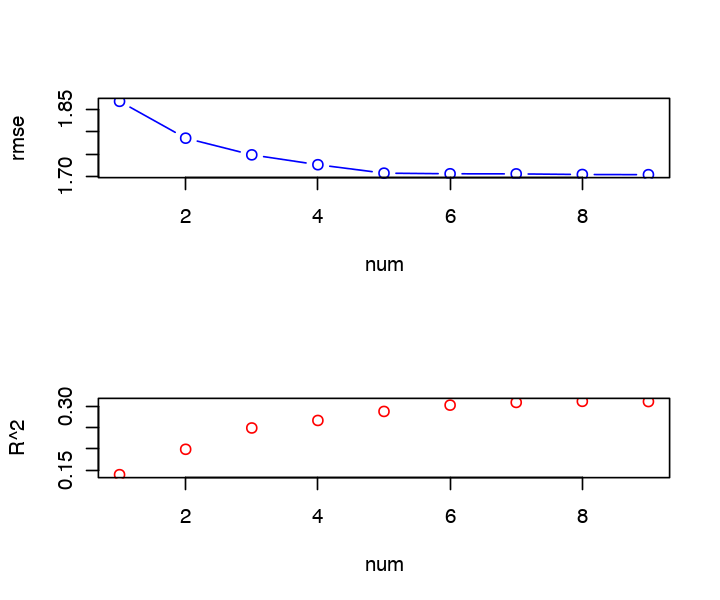

In [123]:
par(mfrow=c(2,1))
num = 1:numVars
plot(num,rmse,type='b',col='blue')
plot(num,res.sum$adjr2,col='red',ylab="R^2")

In [128]:
get_model_formula(4, models, "YIELD")

YIELD ~ HARV_AREA + GDP.PER.CAPITA + AVG_Q3_TEMP + AVG_Q1_RF
<environment: 0x7fcde00136d0>

In [127]:
model = lm(get_model_formula(4, models, "YIELD"), data = dataset)
summary(model)
lm.beta(model)



Call:
lm(formula = get_model_formula(4, models, "YIELD"), data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6486 -1.1393 -0.2925  0.9484  5.9751 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -1.5634856  0.5592055  -2.796  0.00528 ** 
HARV_AREA       0.1457065  0.0211526   6.888 1.05e-11 ***
GDP.PER.CAPITA  0.7662327  0.0449392  17.050  < 2e-16 ***
AVG_Q3_TEMP    -0.0591076  0.0120517  -4.904 1.11e-06 ***
AVG_Q1_RF      -0.0066422  0.0006042 -10.994  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.728 on 920 degrees of freedom
Multiple R-squared:  0.3437,	Adjusted R-squared:  0.3408 
F-statistic: 120.4 on 4 and 920 DF,  p-value: < 2.2e-16


HARV_AREA GDP.PER.CAPITA    AVG_Q3_TEMP      AVG_Q1_RF 
     0.1843513      0.4894498     -0.1527313     -0.3246210

# Annual Total Paddy Rice Production File

Here I detail how I created the file wrs_annual_rice_production.csv. 

On the World Rice Statistics online query engine

http://ricestat.irri.org:8080/wrsv3/entrypoint.htm

I generated a csv file (WRS_paddy_production.csv) for the variable "PRODUCTION - PADDY" for all countries from 1991-2016.

I then read in this file and generated the csv file wrs_annual_rice_production.csv as follows:


In [141]:
# Set the working directory
setwd("/Users/billyhanan/Documents/NCI  Diploma in Data Analytics/Advanced Data Mining/Project")

# Read in WRS file holding annual rice production values
df_rice_production = read.csv("./Data/WRS Data/WRS_paddy_production.csv",header=T)

# Keep FAO source values only
df_rice_production = subset(df_rice_production,Source=="FAO")

# Keep only columns needed
df_rice_production = df_rice_production[,c('Country','Year','Value')]

# Rename the Value column to PRODUCTION
names(df_rice_production)[3] <- "PRODUCTION"

# Remove 2016 data
df_rice_production = df_rice_production[df_rice_production$Year!=2016,]

# Rename some country names that are mis-matched with those in master data frame
levels(df_rice_production$Country)[levels(df_rice_production$Country)=="UNITED STATES OF AMERICA"] = "UNITED STATES"
levels(df_rice_production$Country)[levels(df_rice_production$Country)=="CONGO DR"] = "CONGO"

# Avoid values being converted to scientic notation when writing them out to a file
options(scipen = 999)

# Write data to csv file
write.csv(df_rice_production, file = "./Data/wrs_annual_rice_production.csv",row.names=FALSE,quote=F)